### College of Computing and Informatics, Drexel University
### DSCI 591: Data Analysis and Interpretation, Fall 2020

-----
### Project Title: Crimes in Philadelphia
### Date: 11/10/20

### Project submission group
- Group member 1
    - Name: Raj Patel
    - Email: rbp59@drexel.edu
- Group member 2
    - Name: Hong Son
    - Email: hts34@drexel.edu
- Group member 3
    - Name: Kunal Sharma
    - Email: kos26@drexel.edu
- Group member 4
    - Name: NA
    - Email: NA

------

##  Section 1: Data Loading & Pre-processing

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
#Reading Data from a csv file

crimeData = pd.read_csv("crime.csv")
crimeData.sample(10)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
132950        12   1  2010-10-12 02:43:00    2010-10-12      02:43:00     2   
1001269       12   4  2014-06-01 08:44:00    2014-06-01      08:44:00     8   
535945         3   2  2012-05-04 17:15:00    2012-05-04      17:15:00    17   
1096354       24   1  2014-10-29 12:40:00    2014-10-29      12:40:00    12   
1857273       25   O  2008-02-03 09:09:00    2008-02-03      09:09:00     9   
2184358       35   1  2017-02-03 16:55:00    2017-02-03      16:55:00    16   
1439596        2   C  2007-08-24 22:36:00    2007-08-24      22:36:00    22   
1881099       16   K  2008-09-29 01:23:00    2008-09-29      01:23:00     1   
897276        24   1  2013-05-06 09:24:00    2013-05-06      09:24:00     9   
156720         5   1  2010-12-06 13:49:00    2010-12-06      13:49:00    13   

               Dc_Key             Location_Block  UCR_General  \
132950   201012094105      2200 BLOCK ISLAND AVE       2600.0   
1001269  201412039394      5700 BLOCK HOFFMAN AV       1400.0   
535945   201203028644       200 BLOCK WATKINS ST       2600.0   
1096354  201424095019  3200 BLOCK KENSINGTON AVE        800.0   
1857273  200825011834        900 BLOCK W ERIE AV        600.0   
2184358  201735008563   100 BLOCK E OLNEY AVE C5        800.0   
1439596  200702057648        7600 BLOCK LARGE ST       2600.0   
1881099  200816055241   N 41ST ST / LANCASTER AV        700.0   
897276   201324039309    3800 BLOCK FRANKFORD AV        800.0   
156720   201005025566     3700 BLOCK MANAYUNK AV       1400.0   

                      Text_General_Code  Police_Districts    Month        Lon  \
132950               All Other Offenses               9.0  2010-10 -75.246342   
1001269     Vandalism/Criminal Mischief               9.0  2014-06 -75.236607   
535945               All Other Offenses               3.0  2012-05 -75.150468   
1096354                  Other Assaults              17.0  2014-10 -75.111434   
1857273                          Thefts              18.0  2008-02 -75.142936   
2184358                  Other Assaults              20.0  2017-02 -75.121299   
1439596              All Other Offenses               2.0  2007-08 -75.060117   
1881099  Recovered Stolen Motor Vehicle              12.0  2008-09 -75.205470   
897276                   Other Assaults              17.0  2013-05 -75.094456   
156720      Vandalism/Criminal Mischief               4.0  2010-12 -75.210137   

               Lat  
132950   39.917144  
1001269  39.944611  
535945   39.926394  
1096354  39.997504  
1857273  40.008141  
2184358  40.035317  
1439596  40.054533  
1881099  39.965099  
897276   40.003727  
156720   40.019003

In [3]:
#Information about the datatype of each column in the data set

crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237605 entries, 0 to 2237604
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Dc_Dist             int64  
 1   Psa                 object 
 2   Dispatch_Date_Time  object 
 3   Dispatch_Date       object 
 4   Dispatch_Time       object 
 5   Hour                int64  
 6   Dc_Key              int64  
 7   Location_Block      object 
 8   UCR_General         float64
 9   Text_General_Code   object 
 10  Police_Districts    float64
 11  Month               object 
 12  Lon                 float64
 13  Lat                 float64
dtypes: float64(4), int64(3), object(7)
memory usage: 239.0+ MB


In [4]:
#Statistics about the data

crimeData.describe()

Dc_Dist          Hour        Dc_Key   UCR_General  \
count  2.237605e+06  2.237605e+06  2.237605e+06  2.236942e+06   
mean   1.726837e+01  1.315990e+01  2.010975e+11  1.271354e+03   
std    1.064898e+01  6.799952e+00  3.234684e+08  8.143510e+02   
min    1.000000e+00  0.000000e+00  1.998121e+11  1.000000e+02   
25%    9.000000e+00  9.000000e+00  2.008151e+11  6.000000e+02   
50%    1.600000e+01  1.400000e+01  2.011060e+11  8.000000e+02   
75%    2.400000e+01  1.900000e+01  2.014021e+11  1.800000e+03   
max    9.200000e+01  2.300000e+01  2.017770e+11  2.600000e+03   

       Police_Districts           Lon           Lat  
count      2.217675e+06  2.220256e+06  2.220256e+06  
mean       1.206404e+01 -7.514992e+01  3.999201e+01  
std        5.792056e+00  5.973890e-02  4.534823e-02  
min        1.000000e+00 -7.527773e+01  3.986999e+01  
25%        8.000000e+00 -7.518490e+01  3.995571e+01  
50%        1.200000e+01 -7.515668e+01  3.999105e+01  
75%        1.700000e+01 -7.511844e+01  4.002739e+01  
max        2.200000e+01 -7.495750e+01  4.013790e+01

In [5]:
#Printing name of each columns in the data set and number of na values

for crime in crimeData:
    value = crimeData[crime].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",crime)


There are 663  missing values in column UCR_General
There are 663  missing values in column Text_General_Code
There are 19930  missing values in column Police_Districts
There are 17349  missing values in column Lon
There are 17349  missing values in column Lat


In [6]:
#Sorting the data backwards

crimeData.sort_values("Dispatch_Date_Time", ascending = False)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
2172835       24   3  2017-03-23 01:29:00    2017-03-23      01:29:00     1   
2196468        2   1  2017-03-23 00:33:00    2017-03-23      00:33:00     0   
2184415       39   1  2017-03-23 00:26:00    2017-03-23      00:26:00     0   
2188099        2   3  2017-03-23 00:18:00    2017-03-23      00:18:00     0   
2185761        7   3  2017-03-23 00:06:00    2017-03-23      00:06:00     0   
...          ...  ..                  ...           ...           ...   ...   
1395649       12   P  2006-01-01 00:05:00    2006-01-01      00:05:00     0   
1325562       18   Q  2006-01-01 00:04:00    2006-01-01      00:04:00     0   
1338793       19   R  2006-01-01 00:02:00    2006-01-01      00:02:00     0   
1389932        3   I  2006-01-01 00:02:00    2006-01-01      00:02:00     0   
1038493        3   I  2006-01-01 00:00:00    2006-01-01      00:00:00     0   

               Dc_Key            Location_Block  UCR_General  \
2172835  201724026395    3700 BLOCK RICHMOND ST        400.0   
2196468  201702015317   6400 BLOCK BUSTLETON AV       2600.0   
2184415  201739021055  5700 BLOCK MORRIS ST 101        800.0   
2188099  201702015318     7600 E ROOSEVELT BLVD       1100.0   
2185761  201707007521         500 BLOCK AVON ST        800.0   
...               ...                       ...          ...   
1395649  200612000011      1700 BLOCK S 58TH ST       1500.0   
1325562  200618000007       400 BLOCK S 55TH ST       1500.0   
1338793  200619000047      5500 BLOCK CHERRY ST        800.0   
1389932  200603000001        S 8TH ST /SOUTH ST       2600.0   
1038493  200603000002        S 8TH ST /SOUTH ST       2600.0   

                     Text_General_Code  Police_Districts    Month        Lon  \
2172835  Aggravated Assault No Firearm              17.0  2017-03 -75.087735   
2196468             All Other Offenses               2.0  2017-03 -75.070528   
2184415                 Other Assaults              21.0  2017-03 -75.182257   
2188099                          Fraud               2.0  2017-03 -75.051546   
2185761                 Other Assaults               6.0  2017-03 -75.026776   
...                                ...               ...      ...        ...   
1395649              Weapon Violations               9.0  2006-01 -75.230711   
1325562              Weapon Violations              14.0  2006-01 -75.232374   
1338793                 Other Assaults              15.0  2006-01 -75.231975   
1389932             All Other Offenses               3.0  2006-01 -75.155491   
1038493             All Other Offenses               3.0  2006-01 -75.155491   

               Lat  
2172835  39.990090  
2196468  40.035690  
2184415  40.029790  
2188099  40.050521  
2185761  40.113273  
...            ...  
1395649  39.937644  
1325562  39.953490  
1338793  39.963220  
1389932  39.942416  
1038493  39.942416  

[2237605 rows x 14 columns]

In [7]:
#Cleaning the data by deleting rows with values with nan on geo location

crimeData.replace('', float('NaN'), inplace = True)
crimeData.dropna(subset = ["Lon"], inplace=True)
crimeData.dropna(subset = ["Lat"], inplace=True)

In [8]:
#Let each column be one event

crimeData['events'] = 1

In [9]:
# look at the top 5 rows

crimeData.head()

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
3        35   D  2009-07-19 01:09:00    2009-07-19      01:09:00     1   
4         9   R  2009-06-25 00:14:00    2009-06-25      00:14:00     0   
5        17   1  2015-04-25 12:50:00    2015-04-25      12:50:00    12   
6        23   K  2009-02-10 14:33:00    2009-02-10      14:33:00    14   
12       22   3  2015-10-06 18:18:00    2015-10-06      18:18:00    18   

          Dc_Key        Location_Block  UCR_General   Text_General_Code  \
3   200935061008   5500 BLOCK N 5TH ST       1500.0   Weapon Violations   
4   200909030511   1800 BLOCK WYLIE ST       2600.0  All Other Offenses   
5   201517017705  800 BLOCK S BROAD ST        600.0              Thefts   
6   200923006310  2200 BLOCK RIDGE AVE        800.0      Other Assaults   
12  201522089374  1500 BLOCK N 15TH ST        600.0              Thefts   

    Police_Districts    Month        Lon        Lat  events  
3               20.0  2009-07 -75.130477  40.036389       1  
4                8.0  2009-06 -75.166350  39.969532       1  
5               13.0  2015-04 -75.166412  39.940070       1  
6               16.0  2009-02 -75.171149  39.979586       1  
12              16.0  2015-10 -75.160229  39.976134       1

##  Section 2: Descriptive Statistics

In [10]:
#Making sure the count is equal to the numbers in geo location count

crimeData.describe()

Dc_Dist          Hour        Dc_Key   UCR_General  \
count  2.220256e+06  2.220256e+06  2.220256e+06  2.219602e+06   
mean   1.717890e+01  1.316015e+01  2.010973e+11  1.272504e+03   
std    1.037496e+01  6.801722e+00  3.231813e+08  8.146685e+02   
min    1.000000e+00  0.000000e+00  1.998121e+11  1.000000e+02   
25%    9.000000e+00  9.000000e+00  2.008151e+11  6.000000e+02   
50%    1.600000e+01  1.400000e+01  2.011060e+11  8.000000e+02   
75%    2.400000e+01  1.900000e+01  2.014021e+11  1.800000e+03   
max    9.200000e+01  2.300000e+01  2.017770e+11  2.600000e+03   

       Police_Districts           Lon           Lat     events  
count      2.217675e+06  2.220256e+06  2.220256e+06  2220256.0  
mean       1.206404e+01 -7.514992e+01  3.999201e+01        1.0  
std        5.792056e+00  5.973890e-02  4.534823e-02        0.0  
min        1.000000e+00 -7.527773e+01  3.986999e+01        1.0  
25%        8.000000e+00 -7.518490e+01  3.995571e+01        1.0  
50%        1.200000e+01 -7.515668e+01  3.999105e+01        1.0  
75%        1.700000e+01 -7.511844e+01  4.002739e+01        1.0  
max        2.200000e+01 -7.495750e+01  4.013790e+01        1.0

In [11]:
crimeData = crimeData.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a65ad60>,
      dtype=object)

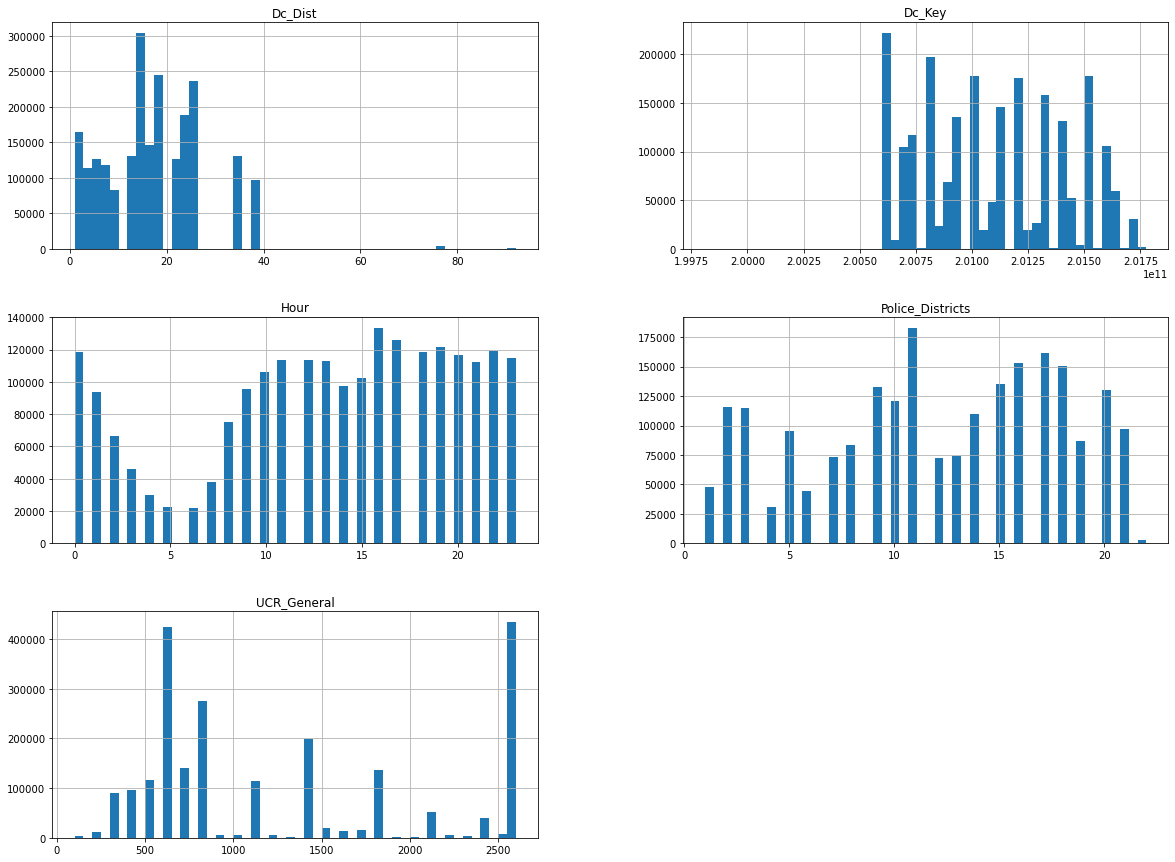

In [12]:
crimeData[['Dc_Dist', 'Hour', 'Dc_Key', 'UCR_General', 'Police_Districts']].hist(bins=50, figsize=(20,15))


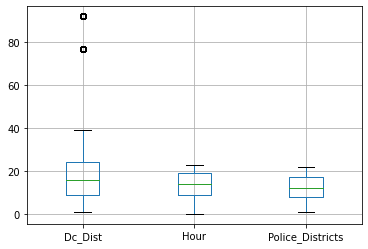

In [13]:
crimeData.boxplot(column=['Dc_Dist', 'Hour', 'Police_Districts'])

In [14]:
#Grouping the data by their area location and sorting backwards

groupCrimeLocations = crimeData.groupby('Location_Block').sum().sort_values("events", ascending = False).reset_index()
groupCrimeLocations = groupCrimeLocations[['Location_Block', 'events']]
groupCrimeLocations.head(25)

Location_Block  events
0              4600 BLOCK E ROOSEVELT BLVD    4443
1                     1000 BLOCK MARKET ST    3970
2                 5200 BLOCK FRANKFORD AVE    3769
3                        0 BLOCK N 52ND ST    2774
4                     1300 BLOCK MARKET ST    2736
5   1600 BLOCK S CHRISTOPHER COLUMBUS BLVD    2346
6                     1500 BLOCK MARKET ST    2321
7                   2300 BLOCK COTTMAN AVE    2088
8                2800 BLOCK KENSINGTON AVE    2042
9                2700 BLOCK KENSINGTON AVE    2028
10                    5200 BLOCK MARKET ST    1745
11                    5900 BLOCK MARKET ST    1710
12                     200 BLOCK S 13TH ST    1685
13                    1500 BLOCK N 52ND ST    1661
14                      300 BLOCK SOUTH ST    1638
15                   5900 BLOCK N BROAD ST    1634
16                   3400 BLOCK N BROAD ST    1621
17          1500 BLOCK JOHN F KENNEDY BLVD    1608
18                      400 BLOCK SOUTH ST    1586
19                   2700 BLOCK CASTOR AVE    1527
20               3200 BLOCK KENSINGTON AVE    1496
21                  1500 BLOCK CHESTNUT ST    1489
22                   300 BLOCK E GURNEY ST    1481
23                   1200 BLOCK N BROAD ST    1475
24                      0 BLOCK MIFFLIN ST    1420

In [15]:
# Look at the number of rows/cols

groupCrimeLocations.shape

(105799, 2)

In [16]:
#Grouping the data by their Geo location and sorting backwards

groupLonLat = crimeData.groupby(['Lon', 'Lat']).sum().sort_values("events", ascending = False).reset_index()
groupLonLat = groupLonLat[['Lon', 'Lat', 'events']]
groupLonLat.head(20)

Lon        Lat  events
0  -75.078182  40.022416    4272
1  -75.099584  40.028490    3620
2  -75.156776  39.951586    3078
3  -75.161485  39.952073    2531
4  -75.122562  39.991480    1925
5  -75.125492  39.989889    1893
6  -75.165287  39.952550    1861
7  -75.113370  39.996571    1698
8  -75.168078  39.906642    1565
9  -75.090676  39.990343    1554
10 -75.058382  40.046868    1501
11 -75.152174  40.004737    1494
12 -75.122202  40.009051    1414
13 -75.143638  39.923506    1355
14 -75.144965  39.927373    1290
15 -75.021674  40.031253    1279
16 -75.144752  40.039082    1260
17 -75.232470  39.954261    1251
18 -75.126851  39.991360    1246
19 -75.092117  39.995831    1224

In [17]:
groupLonLat.shape

(468386, 3)

##  Section 3: Visualizations

(-74.9, -75.3)

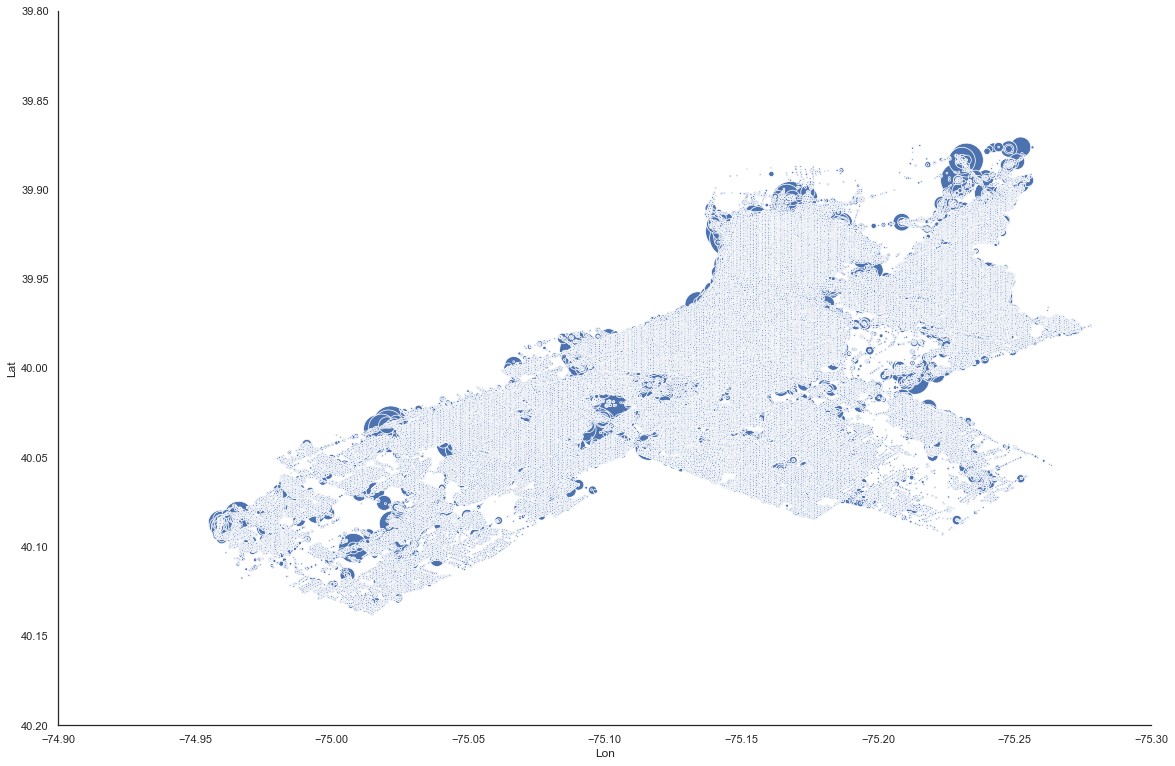

In [18]:
# Q5: What District/Region has the most crimes?

#Plotting a graph through geo location data to get a sence of areas/regions with high number of crimes

sns.set(style="white")
splot = sns.relplot(x="Lon", y="Lat", size="events", sizes=(3,4300), legend=None, data=groupLonLat)
splot.fig.set_size_inches(20, 12)
plt.ylim(40.2, 39.8)
plt.xlim(-74.9,-75.3)

In [19]:
# Get year and view top 10 rows

crimeDataYear = crimeData
crimeDataYear['year'] = pd.DatetimeIndex(crimeData['Dispatch_Date']).year
crimeDataYear.head(10)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
3        35   D  2009-07-19 01:09:00    2009-07-19      01:09:00     1   
4         9   R  2009-06-25 00:14:00    2009-06-25      00:14:00     0   
5        17   1  2015-04-25 12:50:00    2015-04-25      12:50:00    12   
6        23   K  2009-02-10 14:33:00    2009-02-10      14:33:00    14   
12       22   3  2015-10-06 18:18:00    2015-10-06      18:18:00    18   
13       22   3  2015-10-09 00:49:00    2015-10-09      00:49:00     0   
15        2   1  2015-11-30 08:39:00    2015-11-30      08:39:00     8   
18       24   2  2015-04-11 17:38:00    2015-04-11      17:38:00    17   
21       22   4  2015-12-10 12:29:00    2015-12-10      12:29:00    12   
22       15   I  2009-01-11 12:30:00    2009-01-11      12:30:00    12   

          Dc_Key            Location_Block  UCR_General   Text_General_Code  \
3   200935061008       5500 BLOCK N 5TH ST       1500.0   Weapon Violations   
4   200909030511       1800 BLOCK WYLIE ST       2600.0  All Other Offenses   
5   201517017705      800 BLOCK S BROAD ST        600.0              Thefts   
6   200923006310      2200 BLOCK RIDGE AVE        800.0      Other Assaults   
12  201522089374      1500 BLOCK N 15TH ST        600.0              Thefts   
13  201522090172      1500 BLOCK N 17TH ST        600.0              Thefts   
15  201502076521      6500 BLOCK CASTOR AV        600.0              Thefts   
18  201524030846        2800 BLOCK RUTH ST       2400.0  Disorderly Conduct   
21  201522110572  2600 BLOCK W THOMPSON ST        600.0              Thefts   
22  200915003568   5200 BLOCK HARBISON AVE        600.0              Thefts   

    Police_Districts    Month        Lon        Lat  events  year  
3               20.0  2009-07 -75.130477  40.036389       1  2009  
4                8.0  2009-06 -75.166350  39.969532       1  2009  
5               13.0  2015-04 -75.166412  39.940070       1  2015  
6               16.0  2009-02 -75.171149  39.979586       1  2009  
12              16.0  2015-10 -75.160229  39.976134       1  2015  
13              16.0  2015-10 -75.163073  39.977872       1  2015  
15               2.0  2015-11 -75.075602  40.041270       1  2015  
18              17.0  2015-04 -75.122057  39.990907       1  2015  
21              16.0  2015-12 -75.178874  39.975724       1  2015  
22              11.0  2009-01 -75.069032  40.012430       1  2009

In [20]:
#Grouping the data by their Geo location and Year and sorting backwards

groupLonLatYear = crimeData.groupby(['Lon', 'Lat', 'year']).sum().sort_values("events", ascending = False).reset_index()
groupLonLatYear = groupLonLatYear[['Lon', 'Lat', 'year', 'events']]
groupLonLatYear.head(10)

Lon        Lat  year  events
0 -75.078182  40.022416  2015    1309
1 -75.078182  40.022416  2016     899
2 -75.165287  39.952550  2015     601
3 -75.099584  40.028490  2012     496
4 -75.156776  39.951586  2008     474
5 -75.156776  39.951586  2007     470
6 -75.099584  40.028490  2013     466
7 -75.078182  40.022416  2014     453
8 -75.099584  40.028490  2011     441
9 -75.229306  39.894728  2006     412

(-74.9, -75.3)

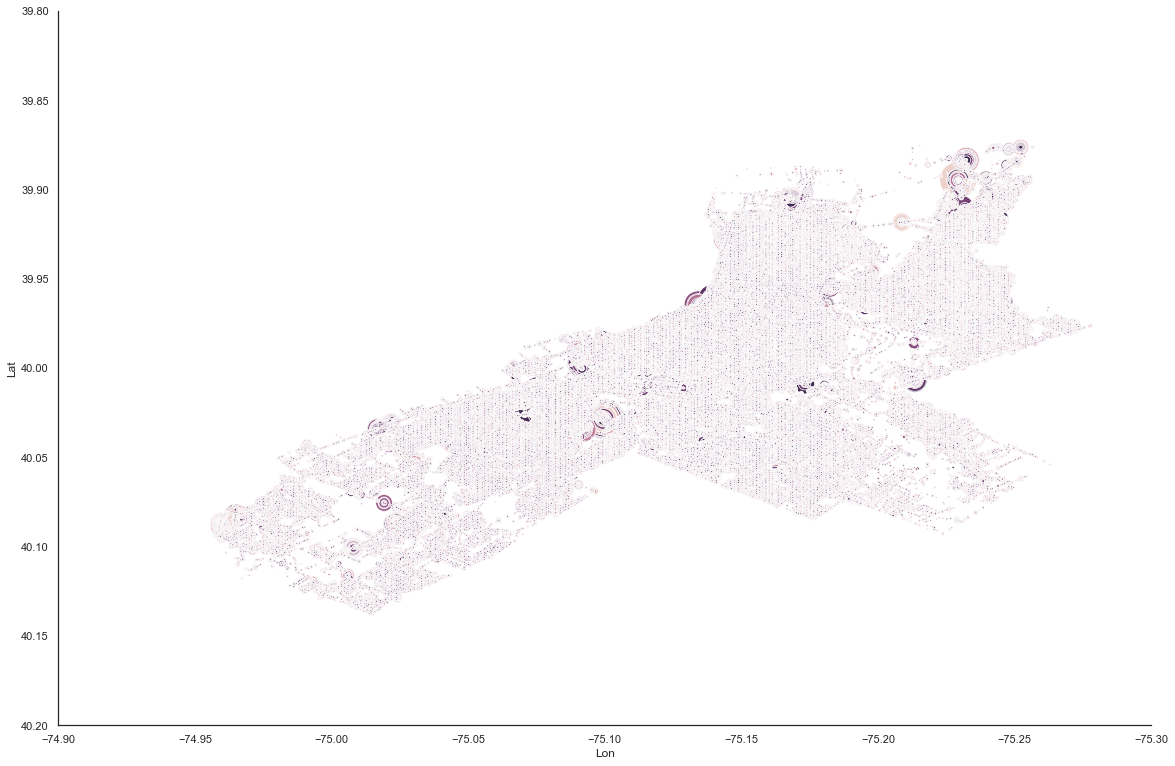

In [21]:
# Q5: What District/Region has the most crimes?

#Plotting a graph through geo location data to get a sence of areas/regions with high number of crimes

sns.set(style="white")
splot = sns.relplot(x="Lon", y="Lat", hue="year", size="events", sizes=(3,4300), legend=None, data=groupLonLatYear)
splot.fig.set_size_inches(20, 12)
plt.ylim(40.2, 39.8)
plt.xlim(-74.9,-75.3)

In [22]:
#Grouping data with Text_General_Code and sorting backward to get the top occured crimes

topCrimes = crimeData.groupby('Text_General_Code').sum().sort_values('events', ascending=False).reset_index()
topCrimes = topCrimes[['Text_General_Code', 'events']]
topCrimes

Text_General_Code  events
0                        All Other Offenses  434335
1                            Other Assaults  275328
2                                    Thefts  254577
3               Vandalism/Criminal Mischief  199280
4                        Theft from Vehicle  169463
5            Narcotic / Drug Law Violations  136354
6                                     Fraud  113450
7            Recovered Stolen Motor Vehicle   94120
8                      Burglary Residential   93975
9             Aggravated Assault No Firearm   68381
10              DRIVING UNDER THE INFLUENCE   52604
11                       Robbery No Firearm   51147
12                      Motor Vehicle Theft   46062
13                          Robbery Firearm   40035
14                       Disorderly Conduct   39738
15               Aggravated Assault Firearm   27638
16                 Burglary Non-Residential   23175
17                        Weapon Violations   18879
18  Other Sex Offenses (Not Commercialized)   15193
19     Prostitution and Commercialized Vice   12814
20                                     Rape   11760
21                       Vagrancy/Loitering    6726
22                                    Arson    5642
23                    Liquor Law Violations    5396
24               Forgery and Counterfeiting    4799
25                             Embezzlement    4639
26                       Public Drunkenness    4582
27                      Homicide - Criminal    3415
28     Offenses Against Family and Children    1786
29                      Gambling Violations     907
30                Receiving Stolen Property     769
31                   Homicide - Justifiable      40
32              Homicide - Gross Negligence      12

In [23]:
#Displaying a list of top occured crimes

topCrimesList, topCrimeData = topCrimes.Text_General_Code.to_list()[2:20], topCrimes.events.to_list()[2:20]
topCrimesList

['Thefts',
 'Vandalism/Criminal Mischief',
 'Theft from Vehicle',
 'Narcotic / Drug Law Violations',
 'Fraud',
 'Recovered Stolen Motor Vehicle',
 'Burglary Residential',
 'Aggravated Assault No Firearm',
 'DRIVING UNDER THE INFLUENCE',
 'Robbery No Firearm',
 'Motor Vehicle Theft',
 'Robbery Firearm',
 'Disorderly Conduct',
 'Aggravated Assault Firearm',
 'Burglary Non-Residential',
 'Weapon Violations',
 'Other Sex Offenses (Not Commercialized)',
 'Prostitution and Commercialized Vice']

[Text(0, 0.5, 'Top Crimes'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Top Occured Crimes')]

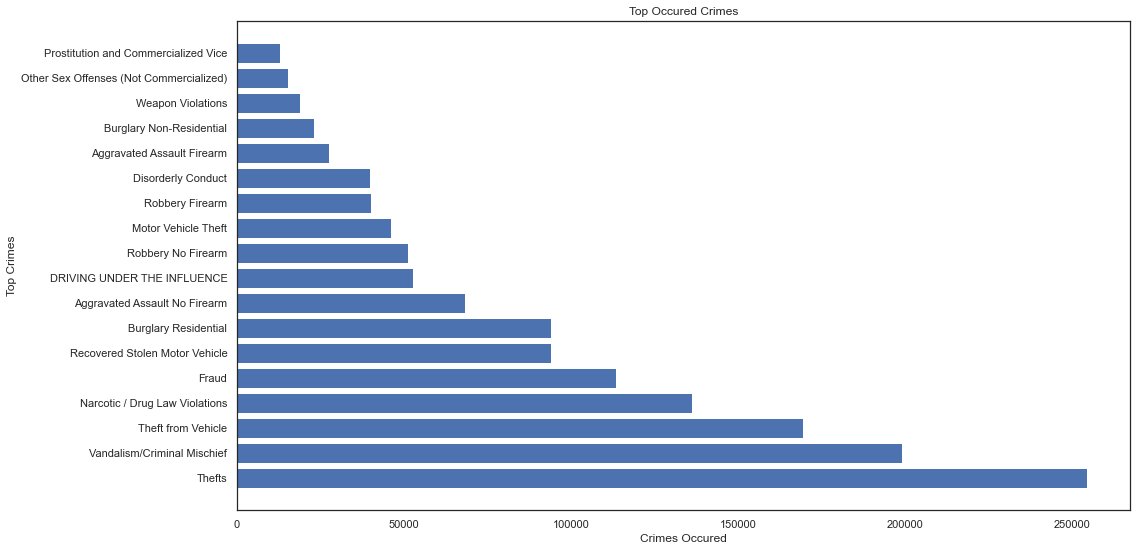

In [24]:
# Q1: What are the top 10 crimes over the 10 year period ? 

#Plotting a graph to visualize each crime occured each day over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(topCrimesList, topCrimeData)
ax.set(xlabel='Crimes Occured', ylabel='Top Crimes',
       title='Top Occured Crimes')

In [25]:
#Updating the data to only have the top occured crime to do some analysis

topCrimesDF = crimeData[crimeData.Text_General_Code.isin(topCrimesList)].copy()
topCrimesDF.head(10)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
3        35   D  2009-07-19 01:09:00    2009-07-19      01:09:00     1   
5        17   1  2015-04-25 12:50:00    2015-04-25      12:50:00    12   
12       22   3  2015-10-06 18:18:00    2015-10-06      18:18:00    18   
13       22   3  2015-10-09 00:49:00    2015-10-09      00:49:00     0   
15        2   1  2015-11-30 08:39:00    2015-11-30      08:39:00     8   
18       24   2  2015-04-11 17:38:00    2015-04-11      17:38:00    17   
21       22   4  2015-12-10 12:29:00    2015-12-10      12:29:00    12   
22       15   I  2009-01-11 12:30:00    2009-01-11      12:30:00    12   
25       18   2  2015-05-05 03:14:00    2015-05-05      03:14:00     3   
26        2   1  2015-12-08 14:42:00    2015-12-08      14:42:00    14   

          Dc_Key               Location_Block  UCR_General  \
3   200935061008          5500 BLOCK N 5TH ST       1500.0   
5   201517017705         800 BLOCK S BROAD ST        600.0   
12  201522089374         1500 BLOCK N 15TH ST        600.0   
13  201522090172         1500 BLOCK N 17TH ST        600.0   
15  201502076521         6500 BLOCK CASTOR AV        600.0   
18  201524030846           2800 BLOCK RUTH ST       2400.0   
21  201522110572     2600 BLOCK W THOMPSON ST        600.0   
22  200915003568      5200 BLOCK HARBISON AVE        600.0   
25  201518027600       5600 BLOCK CHESTNUT ST        600.0   
26  201502078234  4600 BLOCK E ROOSEVELT BLVD        600.0   

     Text_General_Code  Police_Districts    Month        Lon        Lat  \
3    Weapon Violations              20.0  2009-07 -75.130477  40.036389   
5               Thefts              13.0  2015-04 -75.166412  39.940070   
12              Thefts              16.0  2015-10 -75.160229  39.976134   
13              Thefts              16.0  2015-10 -75.163073  39.977872   
15              Thefts               2.0  2015-11 -75.075602  40.041270   
18  Disorderly Conduct              17.0  2015-04 -75.122057  39.990907   
21              Thefts              16.0  2015-12 -75.178874  39.975724   
22              Thefts              11.0  2009-01 -75.069032  40.012430   
25              Thefts              14.0  2015-05 -75.235121  39.959754   
26              Thefts               2.0  2015-12 -75.099584  40.028490   

    events  year  
3        1  2009  
5        1  2015  
12       1  2015  
13       1  2015  
15       1  2015  
18       1  2015  
21       1  2015  
22       1  2009  
25       1  2015  
26       1  2015

In [26]:
# pivot the data frame - each date gets a row, the crimes become columns and the sum of the events become the cell values 

topCrimeCases = pd.pivot_table(topCrimesDF, values='events', index=['Dispatch_Date'], columns=['Text_General_Code'], aggfunc=np.sum)
topCrimeCases = topCrimeCases.sort_values('Dispatch_Date').fillna(0)

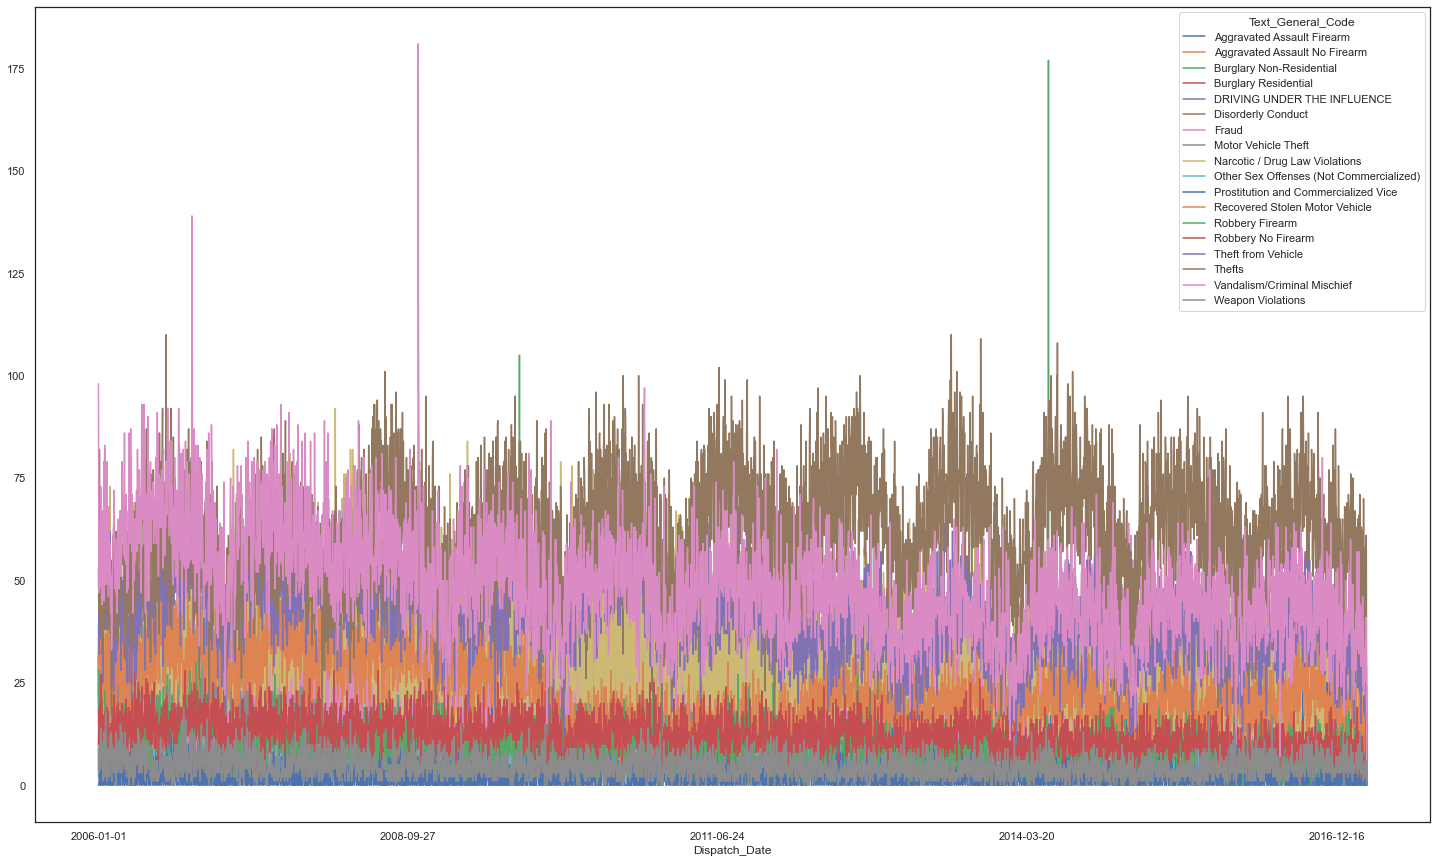

In [27]:
# Q1: What are the top 10 crimes over the 10 year period ? 

#Plotting a graph to visualize each crime occured each day over last 10 years

%matplotlib inline

plt.rcParams['figure.figsize'] = [25, 15]
topCrimeCases.plot()

In [28]:
topCrimeCasesByYear = topCrimeCases

In [29]:
topCrimeCasesByYear.index = pd.DatetimeIndex(topCrimeCases.index).year
topCrimeCasesByYear.reset_index()

Text_General_Code  Dispatch_Date  Aggravated Assault Firearm  \
0                           2006                        11.0   
1                           2006                         7.0   
2                           2006                         7.0   
3                           2006                         5.0   
4                           2006                         5.0   
...                          ...                         ...   
4093                        2017                         4.0   
4094                        2017                         4.0   
4095                        2017                         2.0   
4096                        2017                         4.0   
4097                        2017                         0.0   

Text_General_Code  Aggravated Assault No Firearm  Burglary Non-Residential  \
0                                           36.0                       4.0   
1                                           11.0                      11.0   
2                                            9.0                      12.0   
3                                           15.0                       7.0   
4                                            8.0                       0.0   
...                                          ...                       ...   
4093                                        15.0                       2.0   
4094                                        27.0                       8.0   
4095                                        10.0                       7.0   
4096                                         9.0                       1.0   
4097                                         1.0                       0.0   

Text_General_Code  Burglary Residential  DRIVING UNDER THE INFLUENCE  \
0                                  22.0                         32.0   
1                                  26.0                         12.0   
2                                  29.0                          6.0   
3                                  25.0                          9.0   
4                                  15.0                          8.0   
...                                 ...                          ...   
4093                                5.0                         12.0   
4094                               22.0                         10.0   
4095                               13.0                         11.0   
4096                               24.0                         12.0   
4097                                0.0                          0.0   

Text_General_Code  Disorderly Conduct  Fraud  Motor Vehicle Theft  \
0                                31.0    3.0                 20.0   
1                                 3.0    8.0                 23.0   
2                                 7.0   29.0                 37.0   
3                                13.0   35.0                 21.0   
4                                13.0   21.0                 12.0   
...                               ...    ...                  ...   
4093                              0.0   12.0                  7.0   
4094                              2.0   36.0                  9.0   
4095                              3.0   34.0                  6.0   
4096                              0.0   31.0                 10.0   
4097                              0.0    1.0                  0.0   

Text_General_Code  Narcotic / Drug Law Violations  \
0                                            15.0   
1                                            32.0   
2                                            40.0   
3                                            57.0   
4                                            50.0   
...                                           ...   
4093                                         23.0   
4094                                          9.0   
4095                                         33.0   
4096                                         19.0   
4097             

In [30]:
#Grouping by year to get total number of each top occured crime for further analysis

topCrimeCasesByYear = topCrimeCasesByYear.groupby('Dispatch_Date').sum()
topCrimeCasesByYear

Text_General_Code  Aggravated Assault Firearm  Aggravated Assault No Firearm  \
Dispatch_Date                                                                  
2006                                   3305.0                         6981.0   
2007                                   2826.0                         6465.0   
2008                                   2655.0                         6980.0   
2009                                   2378.0                         6348.0   
2010                                   2509.0                         6308.0   
2011                                   2384.0                         6367.0   
2012                                   2397.0                         6184.0   
2013                                   2215.0                         5655.0   
2014                                   2052.0                         5388.0   
2015                                   2274.0                         5412.0   
2016                                   2213.0                         5247.0   
2017                                    430.0                         1046.0   

Text_General_Code  Burglary Non-Residential  Burglary Residential  \
Dispatch_Date                                                       
2006                                 2664.0                8531.0   
2007                                 2591.0                8625.0   
2008                                 2636.0               10213.0   
2009                                 2202.0                8698.0   
2010                                 2032.0                8745.0   
2011                                 2106.0                9905.0   
2012                                 2237.0                9746.0   
2013                                 1722.0                8646.0   
2014                                 1868.0                7797.0   
2015                                 1461.0                6613.0   
2016                                 1377.0                5494.0   
2017                                  279.0                 962.0   

Text_General_Code  DRIVING UNDER THE INFLUENCE  Disorderly Conduct    Fraud  \
Dispatch_Date                                                                 
2006                                    4522.0              4351.0   9266.0   
2007                                    5294.0              4099.0  10021.0   
2008                                    6082.0              4422.0  10577.0   
2009                                    5569.0              4439.0   9817.0   
2010                                    5149.0              4312.0   8947.0   
2011                                    4916.0              3250.0   9127.0   
2012                                    4619.0              3929.0   9107.0   
2013                                    4193.0              3088.0   8898.0   
2014                                    3836.0              3069.0  11129.0   
2015                                    3905.0              2980.0  12497.0   
2016                                    3679.0              1588.0  11641.0   
2017                                     840.0               211.0   2423.0   

Text_General_Code  Motor Vehicle Theft  Narcotic / Drug Law Violations  \
Dispatch_Date                                                            
2006                            8700.0                         13561.0   
2007                            6628.0                         14822.0   
2008                            3203.0                         15810.0   
2009                            2337.0                         14983.0   
2010                            6422.0                         14062.0   
2011                            6765.0                         12843.0   
2012                            3066.0                         11794.0   
2013                            2295.0                         11659.0   
2014                            2160.0                          9

In [31]:
#taking off 2017 because we only have data until march

topCrimeCasesByYear = topCrimeCasesByYear.iloc[:-1,:]
topCrimeCasesByYear

Text_General_Code  Aggravated Assault Firearm  Aggravated Assault No Firearm  \
Dispatch_Date                                                                  
2006                                   3305.0                         6981.0   
2007                                   2826.0                         6465.0   
2008                                   2655.0                         6980.0   
2009                                   2378.0                         6348.0   
2010                                   2509.0                         6308.0   
2011                                   2384.0                         6367.0   
2012                                   2397.0                         6184.0   
2013                                   2215.0                         5655.0   
2014                                   2052.0                         5388.0   
2015                                   2274.0                         5412.0   
2016                                   2213.0                         5247.0   

Text_General_Code  Burglary Non-Residential  Burglary Residential  \
Dispatch_Date                                                       
2006                                 2664.0                8531.0   
2007                                 2591.0                8625.0   
2008                                 2636.0               10213.0   
2009                                 2202.0                8698.0   
2010                                 2032.0                8745.0   
2011                                 2106.0                9905.0   
2012                                 2237.0                9746.0   
2013                                 1722.0                8646.0   
2014                                 1868.0                7797.0   
2015                                 1461.0                6613.0   
2016                                 1377.0                5494.0   

Text_General_Code  DRIVING UNDER THE INFLUENCE  Disorderly Conduct    Fraud  \
Dispatch_Date                                                                 
2006                                    4522.0              4351.0   9266.0   
2007                                    5294.0              4099.0  10021.0   
2008                                    6082.0              4422.0  10577.0   
2009                                    5569.0              4439.0   9817.0   
2010                                    5149.0              4312.0   8947.0   
2011                                    4916.0              3250.0   9127.0   
2012                                    4619.0              3929.0   9107.0   
2013                                    4193.0              3088.0   8898.0   
2014                                    3836.0              3069.0  11129.0   
2015                                    3905.0              2980.0  12497.0   
2016                                    3679.0              1588.0  11641.0   

Text_General_Code  Motor Vehicle Theft  Narcotic / Drug Law Violations  \
Dispatch_Date                                                            
2006                            8700.0                         13561.0   
2007                            6628.0                         14822.0   
2008                            3203.0                         15810.0   
2009                            2337.0                         14983.0   
2010                            6422.0                         14062.0   
2011                            6765.0                         12843.0   
2012                            3066.0                         11794.0   
2013                            2295.0                         11659.0   
2014                            2160.0                          9583.0   
2015                            1901.0                          7566.0   
2016                            2110.0                          7777.0   

Text_General_Code  Other Sex Offenses (Not Commercialized)  \
Dispatch

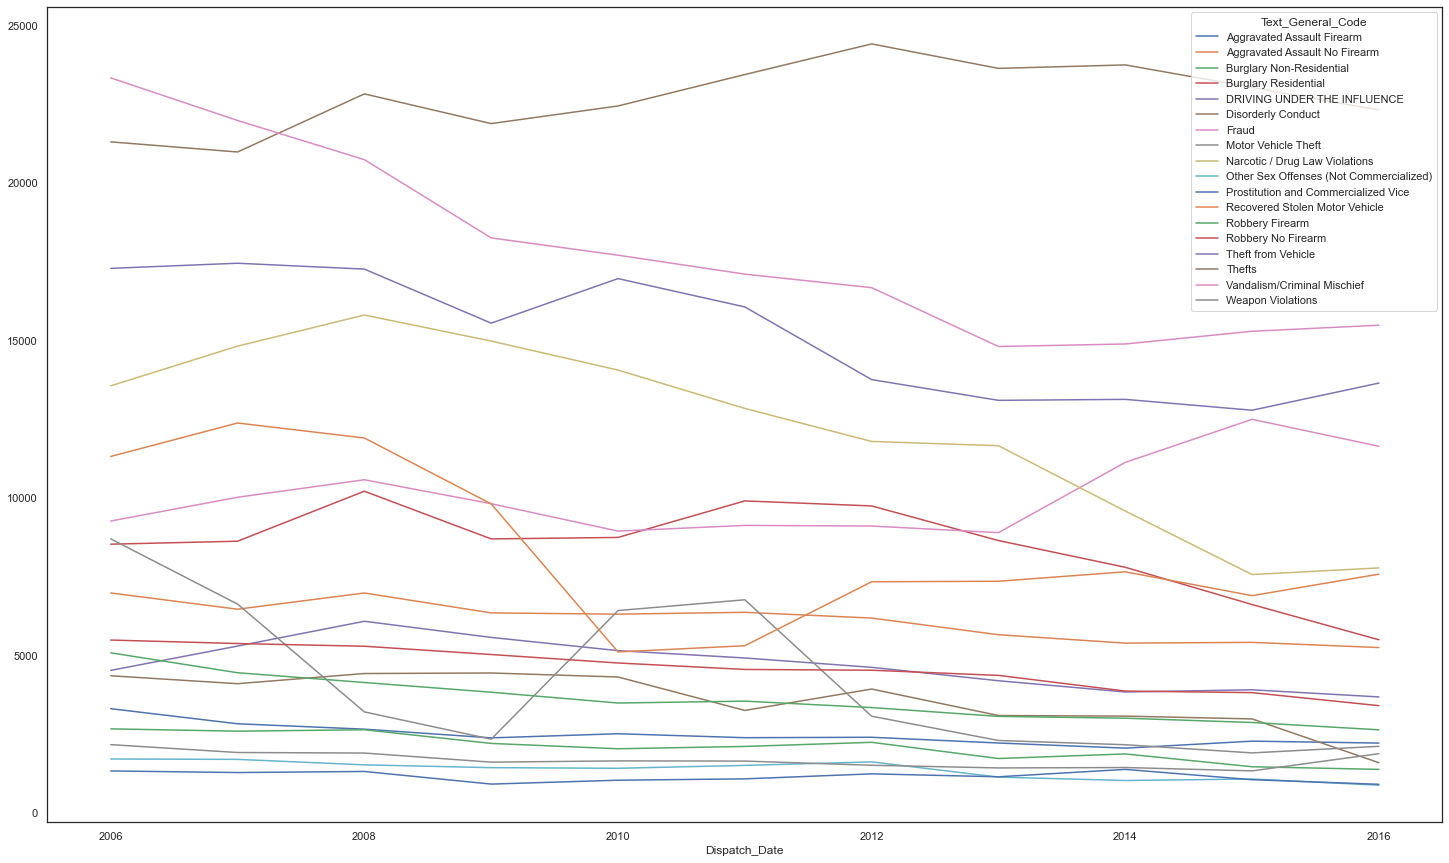

In [32]:
# Q2: Have crimes been increasing over the 10 year period?
# Q3: What types of crimes are on the rise? What types of crimes have fallen? (Over 10 year period)

#Some have declined and some like Fraud have increased

topCrimeCasesByYear.plot()

In [33]:
topCrimeCasesByYear['Total Events'] = topCrimeCasesByYear.sum(axis=1)
topCrimeCasesByYear = topCrimeCasesByYear.reset_index()

<ipython-input-33-98b003c2b8cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCrimeCasesByYear['Total Events'] = topCrimeCasesByYear.sum(axis=1)


[Text(0, 0.5, 'Year'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Crimes occured each Year')]

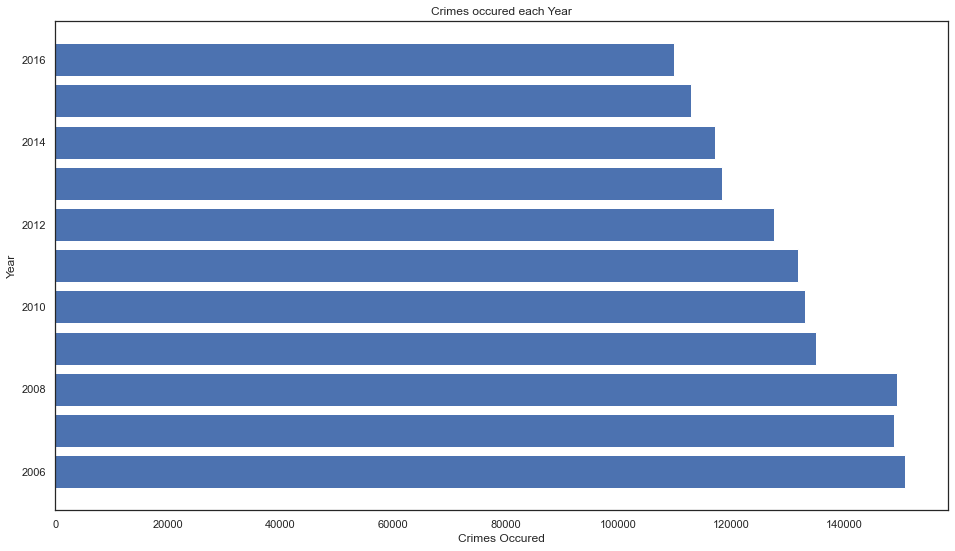

In [34]:
#Plotting a graph to visualize each crime occured by hour over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(topCrimeCasesByYear['Dispatch_Date'].to_list(), topCrimeCasesByYear['Total Events'].to_list())
ax.set(xlabel='Crimes Occured', ylabel='Year',
       title='Crimes occured each Year')

In [35]:
#Getting crimes by the hour

crimeDataHour = crimeData.groupby('Hour').sum().reset_index()
crimeDataHour = crimeDataHour[['Hour', 'events']]

[Text(0, 0.5, 'Hour'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Crimes occured by hour')]

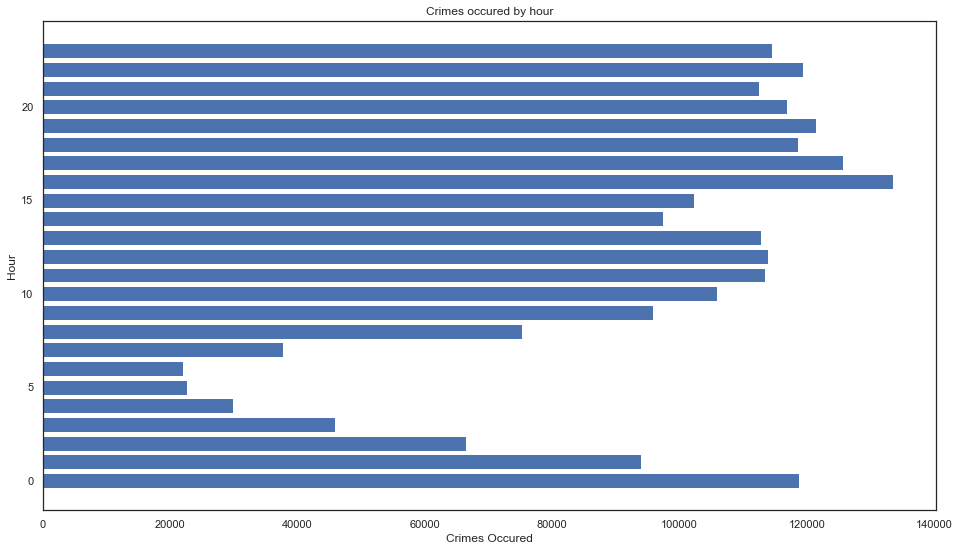

In [36]:

#Plotting a graph to visualize each crime occured by hour over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(crimeDataHour['Hour'].to_list(), crimeDataHour['events'].to_list())
ax.set(xlabel='Crimes Occured', ylabel='Hour',
       title='Crimes occured by hour')

In [37]:
# pivot the data frame - each hour gets a row, the crimes become columns and the sum of the events become the cell values 

crimeDataByHour = pd.pivot_table(crimeData, values='events', index=['Hour'], columns=['Text_General_Code'], aggfunc=np.sum)
crimeDataByHour = crimeDataByHour.fillna(0)

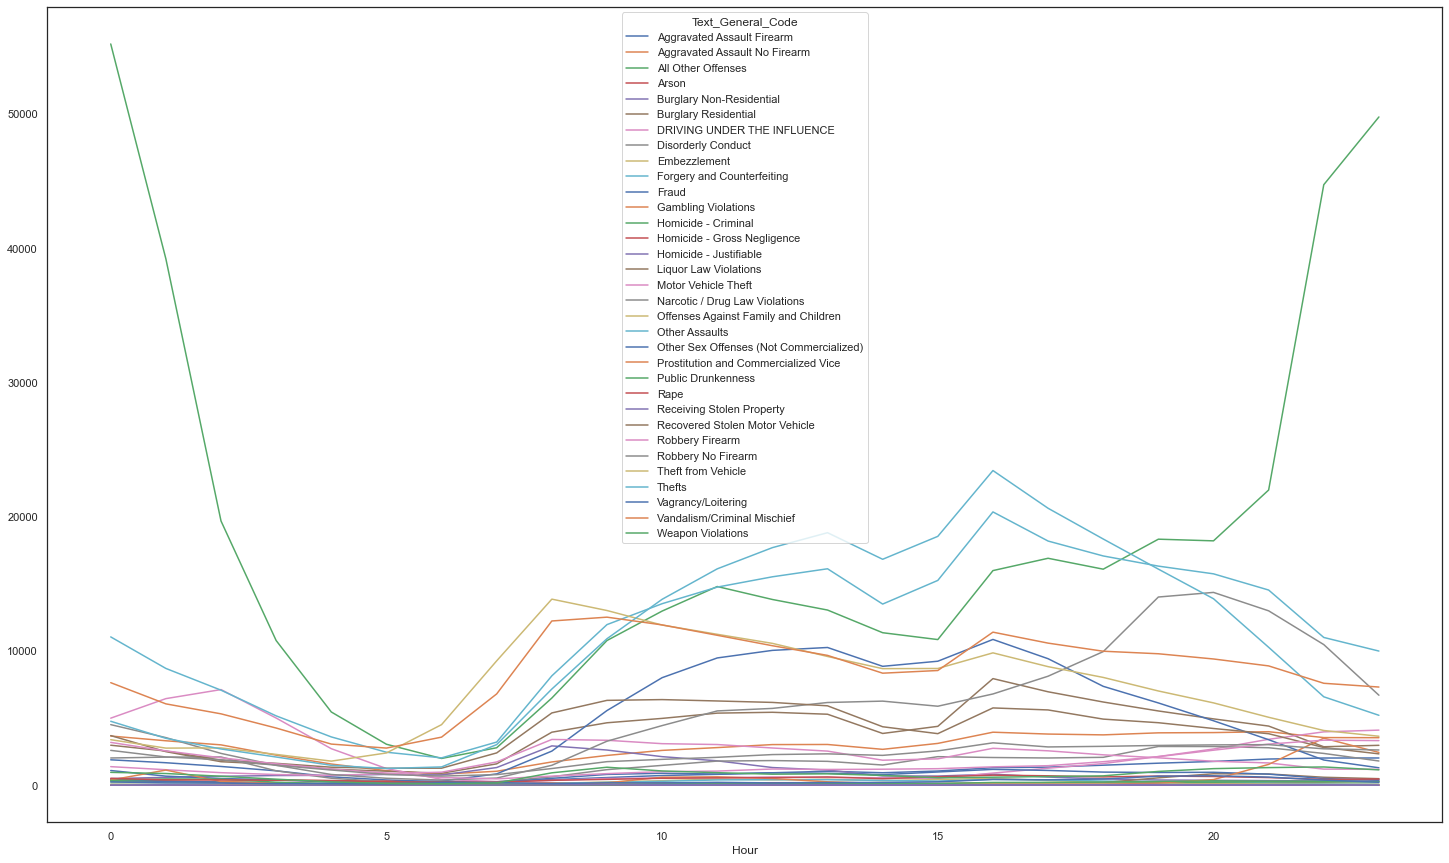

In [38]:
# Q7: What are the dangerous times (hours) to be outside or for crimes to happen?

crimeDataByHour.plot()

In [39]:
# Create Total events 

crimeDataByHour['Total events'] = crimeDataHour['events']
crimeDataByHour

Text_General_Code  Aggravated Assault Firearm  Aggravated Assault No Firearm  \
Hour                                                                           
0                                      1894.0                         3665.0   
1                                      1676.0                         3312.0   
2                                      1398.0                         3007.0   
3                                      1075.0                         2242.0   
4                                       625.0                         1580.0   
5                                       392.0                         1086.0   
6                                       267.0                          825.0   
7                                       257.0                         1041.0   
8                                       417.0                         1735.0   
9                                       572.0                         2220.0   
10                                      725.0                         2595.0   
11                                      812.0                         2804.0   
12                                      928.0                         3028.0   
13                                     1042.0                         3036.0   
14                                      930.0                         2674.0   
15                                     1059.0                         3116.0   
16                                     1305.0                         3950.0   
17                                     1348.0                         3812.0   
18                                     1493.0                         3751.0   
19                                     1642.0                         3903.0   
20                                     1773.0                         3922.0   
21                                     1951.0                         3986.0   
22                                     2027.0                         3550.0   
23                                     2030.0                         3541.0   

Text_General_Code  All Other Offenses  Arson  Burglary Non-Residential  \
Hour                                                                     
0                             55213.0  434.0                     494.0   
1                             39210.0  422.0                     586.0   
2                             19682.0  417.0                     667.0   
3                             10778.0  394.0                     723.0   
4                              5457.0  351.0                     737.0   
5                              3053.0  310.0                     804.0   
6                              1995.0  149.0                     766.0   
7                              2793.0  123.0                    1318.0   
8                              6495.0  178.0                    2931.0   
9                             10779.0  162.0                    2622.0   
10                            12972.0  168.0                    2129.0   
11                            14801.0  181.0                    1818.0   
12                            13836.0  188.0                    1318.0   
13                            13049.0  195.0                    1128.0   
14                            11360.0  161.0                     695.0   
15                            10850.0  129.0                     684.0   
16                            15988.0  175.0                     825.0   
17                            16905.0  159.0                     610.0   
18                            16093.0  151.0                     472.0   
19                            18327.0  183.0                     390.0   
20                            18203.0  225.0                     368.0   
21                            21989.0  232.0                     344.0   
22                            44730.0  246.0                     321.0   
23                            49777.0  309.0                     425.

In [40]:
#Total Number of crimes that have occured with their category

crimeDataByHour.sum()

Text_General_Code
Aggravated Assault Firearm                   27638.0
Aggravated Assault No Firearm                68381.0
All Other Offenses                          434335.0
Arson                                         5642.0
Burglary Non-Residential                     23175.0
Burglary Residential                         93975.0
DRIVING UNDER THE INFLUENCE                  52604.0
Disorderly Conduct                           39738.0
Embezzlement                                  4639.0
Forgery and Counterfeiting                    4799.0
Fraud                                       113450.0
Gambling Violations                            907.0
Homicide - Criminal                           3415.0
Homicide - Gross Negligence                     12.0
Homicide - Justifiable                          40.0
Liquor Law Violations                         5396.0
Motor Vehicle Theft                          46062.0
Narcotic / Drug Law Violations              136354.0
Offenses Against Family and 

In [41]:
#Writing data to a csv file

#crimeDataByHour.to_csv('crimeDataByHour.csv')

### Comparing Data from different parts of Philly

In [42]:
# Use Lat coordinates to split data for north philly

northPhillyCrimeData = crimeData[crimeData['Lat'] > 39.952479]
northPhillyCrimeData.shape

(1726161, 16)

[Text(0, 0.5, 'Hour'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Crimes occured by hour')]

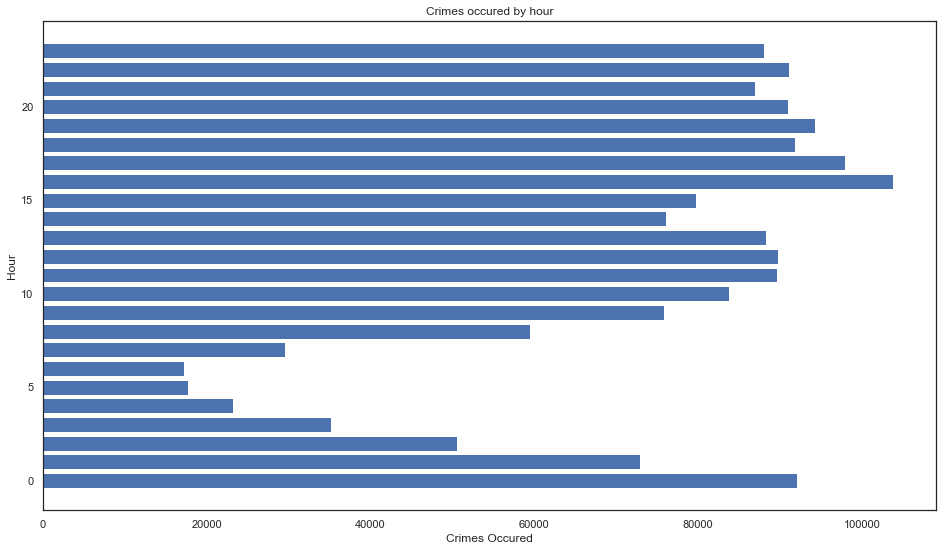

In [43]:
#Getting crimes by the hour for North Philly
#Plotting a graph to visualize each crime occured in North Philly by hour over last 10 years

northPhillyCrimeDataHour = northPhillyCrimeData.groupby('Hour').sum().reset_index()
northPhillyCrimeDataHour = northPhillyCrimeDataHour[['Hour', 'events']]


fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(northPhillyCrimeDataHour['Hour'].to_list(), northPhillyCrimeDataHour['events'].to_list())
ax.set(xlabel='Crimes Occured', ylabel='Hour',
       title='Crimes occured by hour')

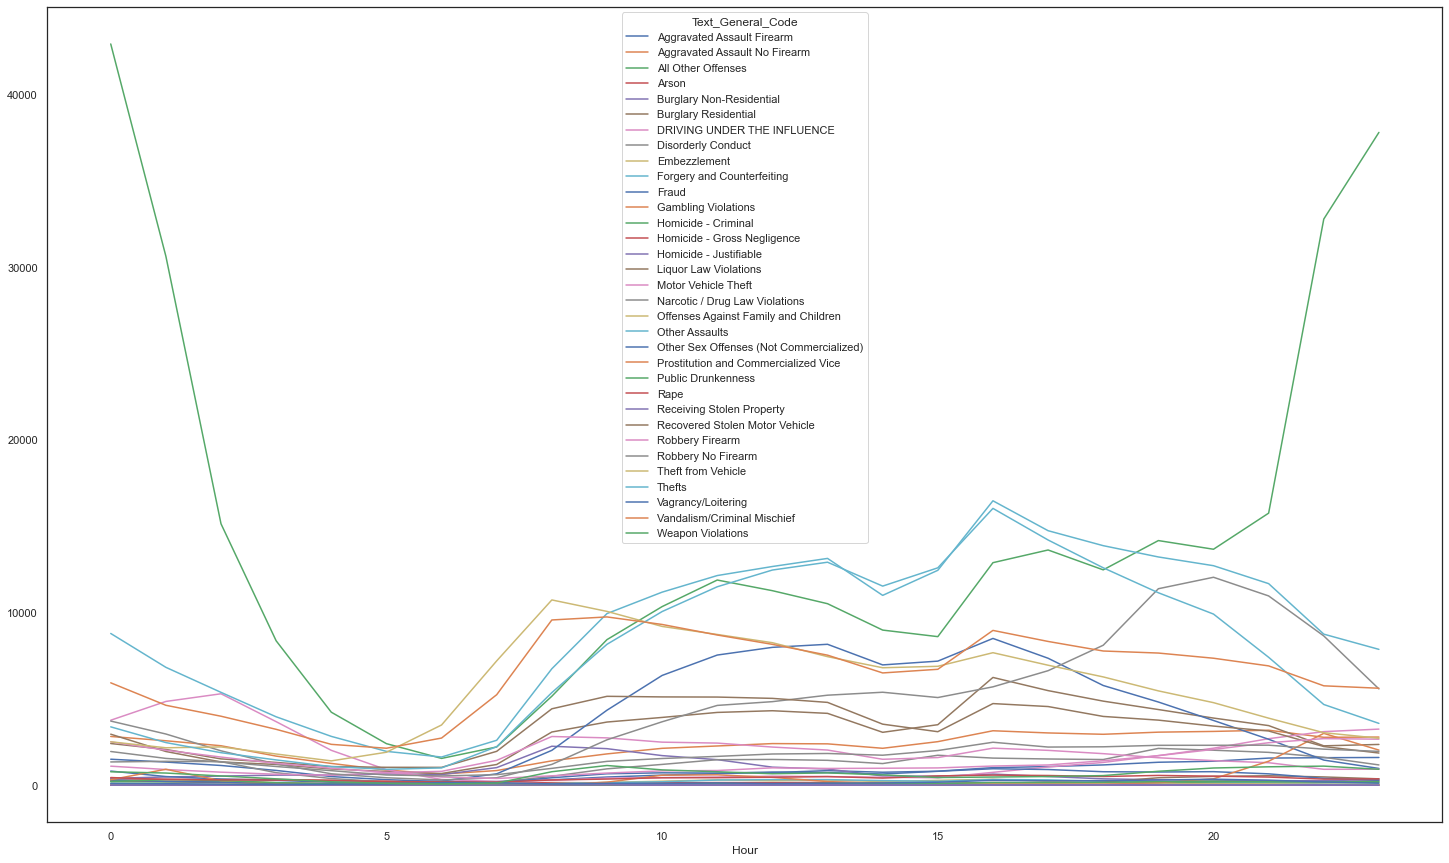

In [44]:
# North Philly Crimes that have occured by the hour 

northCrimeDataByHour = pd.pivot_table(northPhillyCrimeData, values='events', index=['Hour'], columns=['Text_General_Code'], aggfunc=np.sum)
northCrimeDataByHour = northCrimeDataByHour.fillna(0)
northCrimeDataByHour.plot()

In [45]:
# Use Lat coordinates to split data for south philly

southPhillyCrimeData = crimeData[crimeData['Lat'] < 39.952479]
southPhillyCrimeData.shape

(490843, 16)

[Text(0, 0.5, 'Hour'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Crimes occured by hour')]

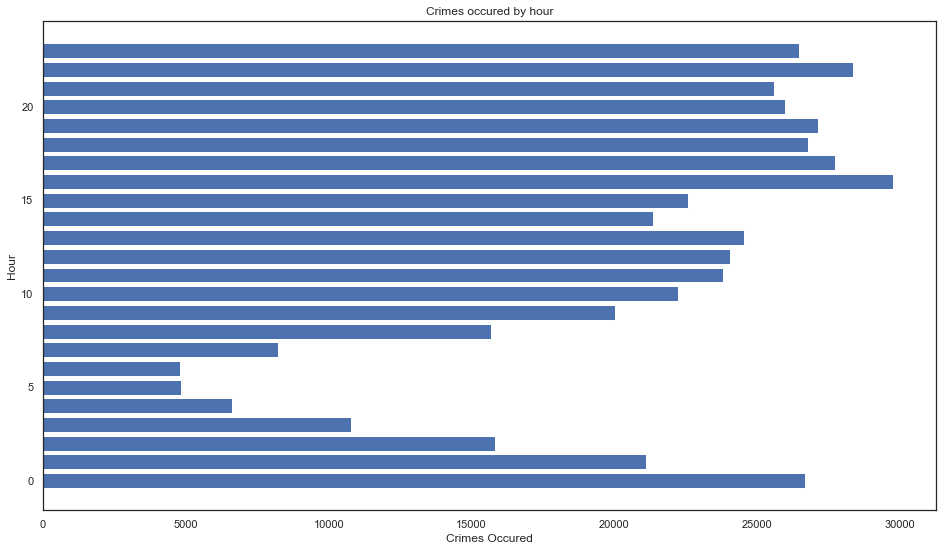

In [46]:
#Getting crimes by the hour for South Philly
#Plotting a graph to visualize each crime occured in South Philly by hour over last 10 years

southPhillyCrimeDataHour = southPhillyCrimeData.groupby('Hour').sum().reset_index()
southPhillyCrimeDataHour = southPhillyCrimeDataHour[['Hour', 'events']]


fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(southPhillyCrimeDataHour['Hour'].to_list(), southPhillyCrimeDataHour['events'].to_list())
ax.set(xlabel='Crimes Occured', ylabel='Hour',
       title='Crimes occured by hour')

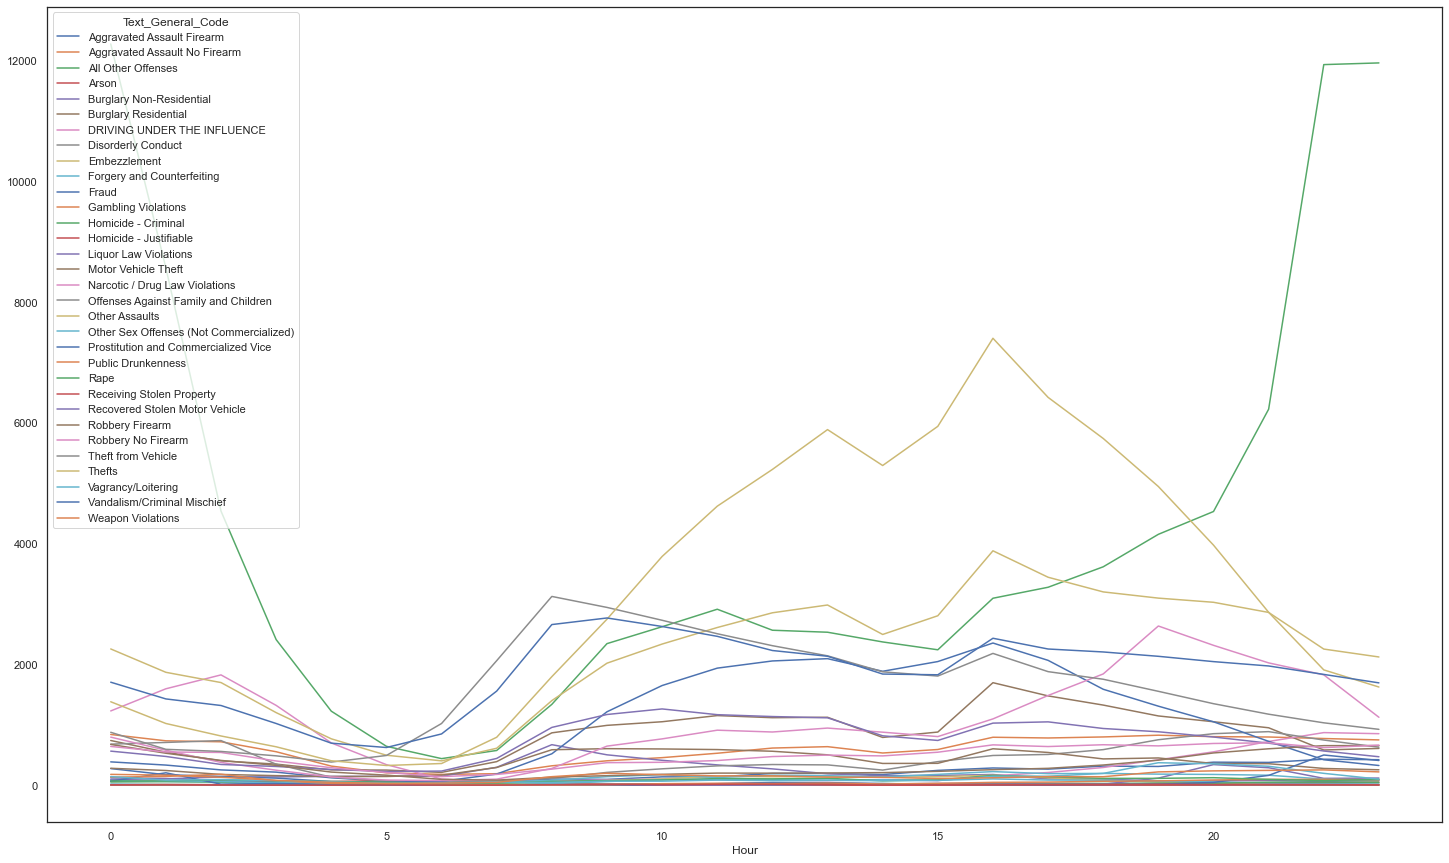

In [47]:
# South Philly Crimes that have occured by the hour 

southCrimeDataByHour = pd.pivot_table(southPhillyCrimeData, values='events', index=['Hour'], columns=['Text_General_Code'], aggfunc=np.sum)
southCrimeDataByHour = southCrimeDataByHour.fillna(0)
southCrimeDataByHour.plot()

In [48]:
# Use Lat coordinates to split data for west philly

westPhillyCrimeData = crimeData[crimeData['Lon'] < -75.163668]
westPhillyCrimeData.shape

(933594, 16)

[Text(0, 0.5, 'Hour'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Crimes occured by hour')]

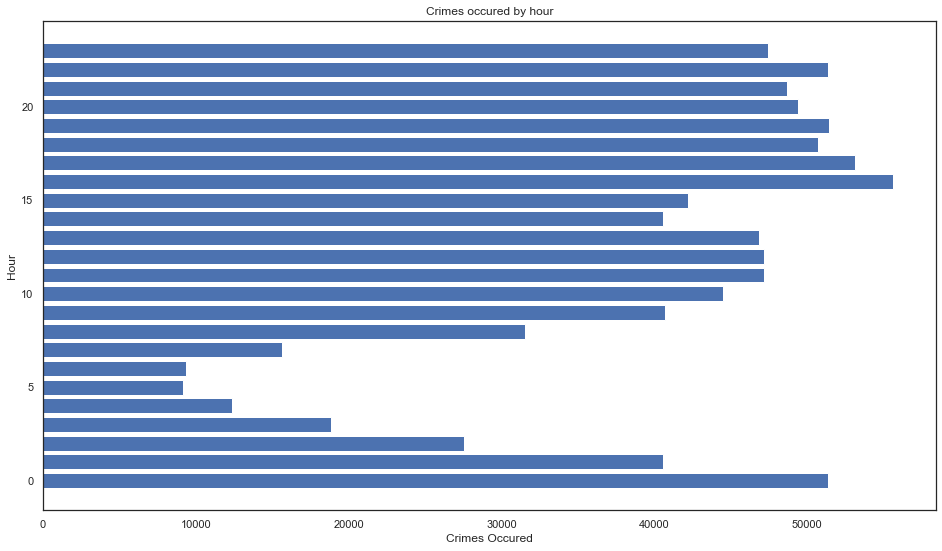

In [49]:
#Getting crimes by the hour for West Philly
#Plotting a graph to visualize each crime occured in West Philly by hour over last 10 years

westPhillyCrimeDataHour = westPhillyCrimeData.groupby('Hour').sum().reset_index()
westPhillyCrimeDataHour = westPhillyCrimeDataHour[['Hour', 'events']]


fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(westPhillyCrimeDataHour['Hour'].to_list(), westPhillyCrimeDataHour['events'].to_list())
ax.set(xlabel='Crimes Occured', ylabel='Hour',
       title='Crimes occured by hour')

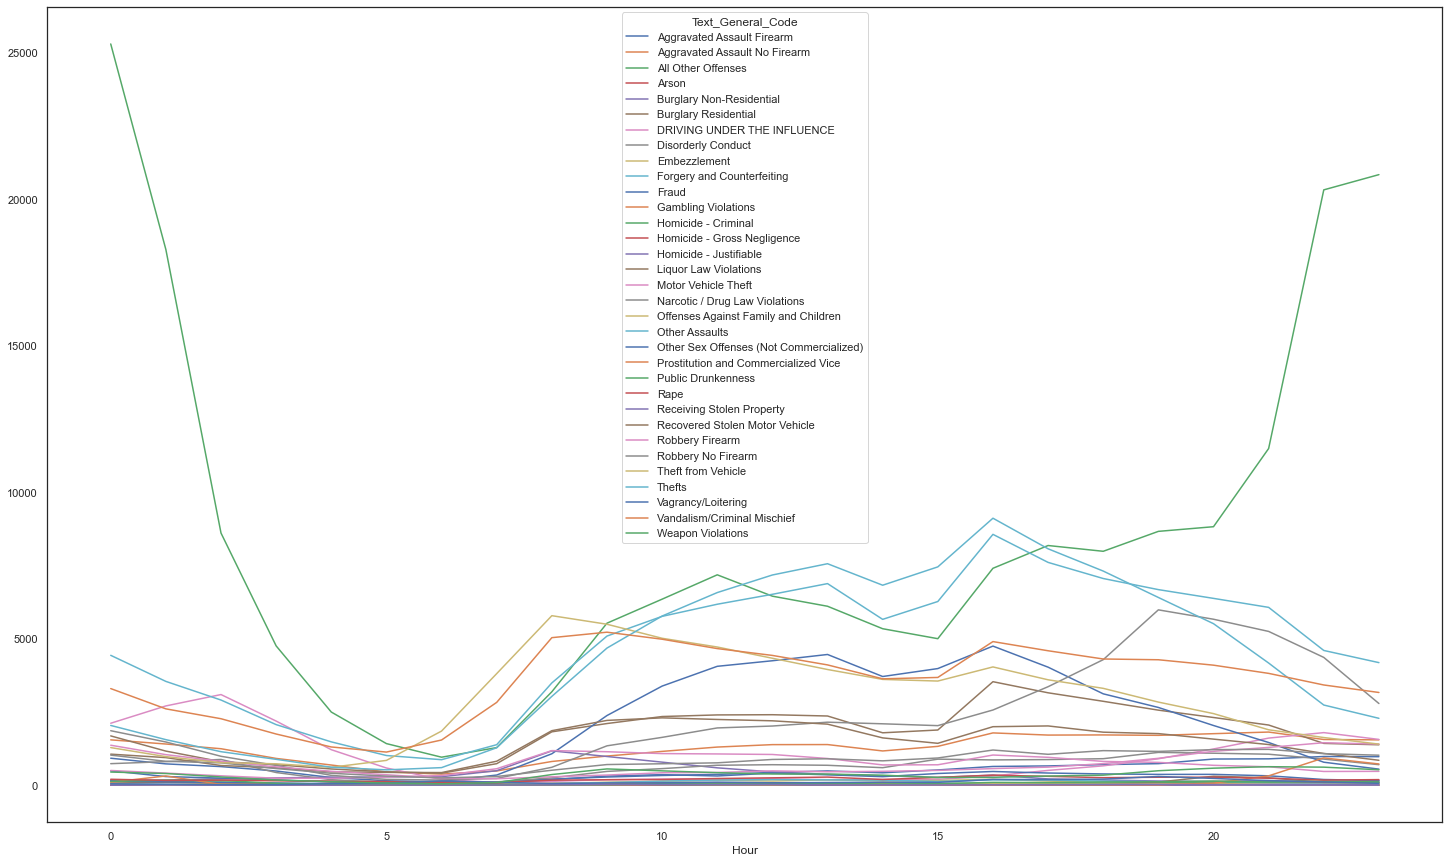

In [50]:
# West Philly Crimes that have occured by the hour

westCrimeDataByHour = pd.pivot_table(westPhillyCrimeData, values='events', index=['Hour'], columns=['Text_General_Code'], aggfunc=np.sum)
westCrimeDataByHour = westCrimeDataByHour.fillna(0)
westCrimeDataByHour.plot()

[Text(0, 0.5, 'Top Crimes'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Top Occured Crimes in North Philly')]

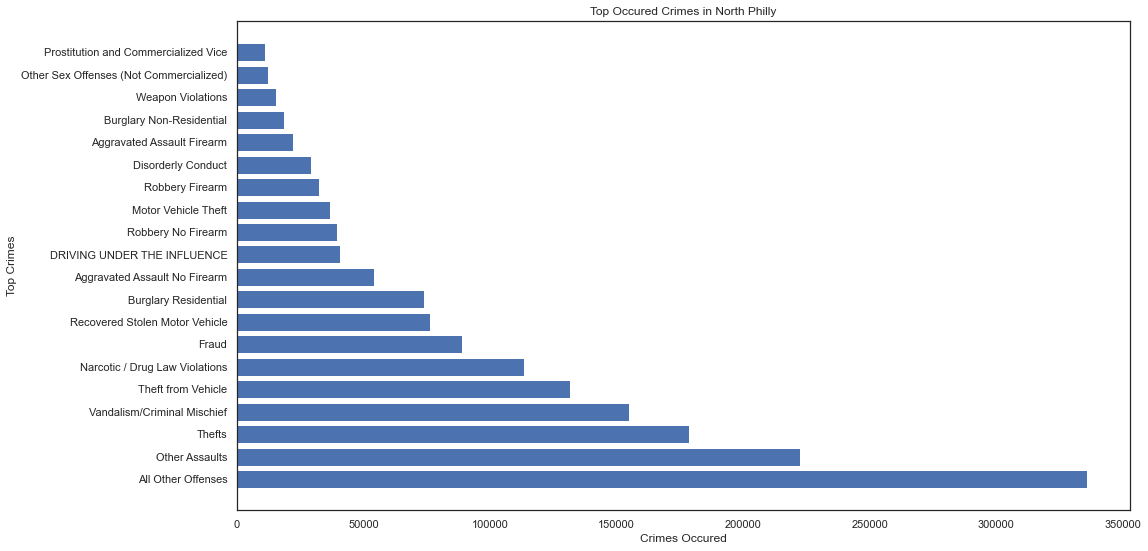

In [51]:
#Grouping data with Text_General_Code and sorting backward to get the top occured crimes

topCrimesNorthPhilly = northPhillyCrimeData.groupby('Text_General_Code').sum().sort_values('events', ascending=False).reset_index()

#Getting a list of top occured crimes

topCrimesListNorthPhilly, topCrimeDataNorthPhilly = topCrimesNorthPhilly.Text_General_Code.to_list()[:20], topCrimesNorthPhilly.events.to_list()[:20]
 

#Plotting a graph to visualize each crime occured each day over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(topCrimesListNorthPhilly, topCrimeDataNorthPhilly)
ax.set(xlabel='Crimes Occured', ylabel='Top Crimes',
       title='Top Occured Crimes in North Philly')

[Text(0, 0.5, 'Top Crimes'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Top Occured Crimes in South Philly')]

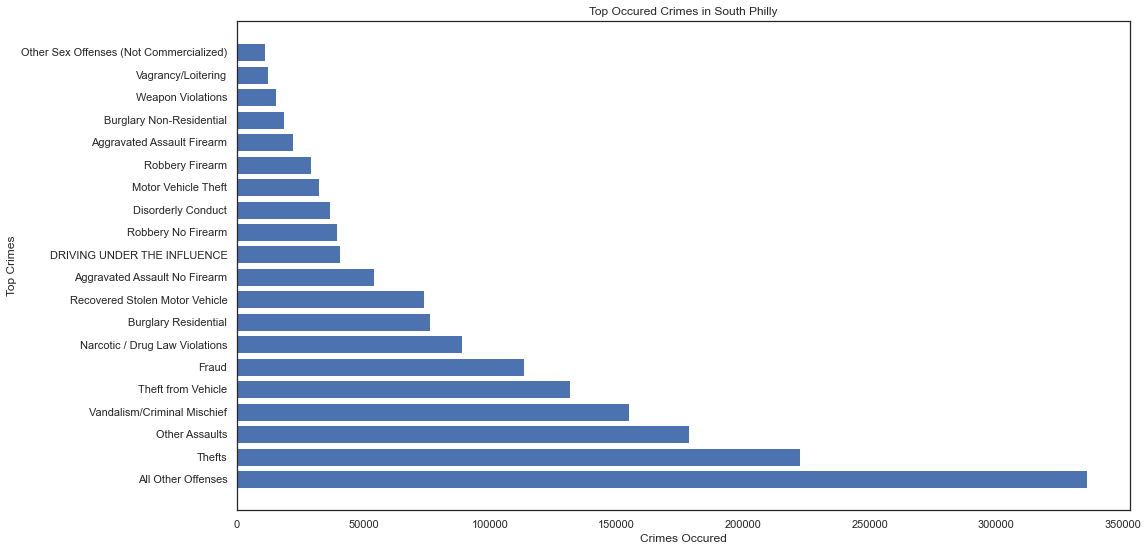

In [52]:
#Grouping data with Text_General_Code and sorting backward to get the top occured crimes

topCrimesSouthPhilly = southPhillyCrimeData.groupby('Text_General_Code').sum().sort_values('events', ascending=False).reset_index()

#Getting a list of top occured crimes

topCrimesListSouthPhilly, topCrimeDataSouthPhilly = topCrimesSouthPhilly.Text_General_Code.to_list()[:20], topCrimesNorthPhilly.events.to_list()[:20]
 

#Plotting a graph to visualize each crime occured each day over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(topCrimesListSouthPhilly, topCrimeDataSouthPhilly)
ax.set(xlabel='Crimes Occured', ylabel='Top Crimes',
       title='Top Occured Crimes in South Philly')

[Text(0, 0.5, 'Top Crimes'),
 Text(0.5, 0, 'Crimes Occured'),
 Text(0.5, 1.0, 'Top Occured Crimes in West Philly')]

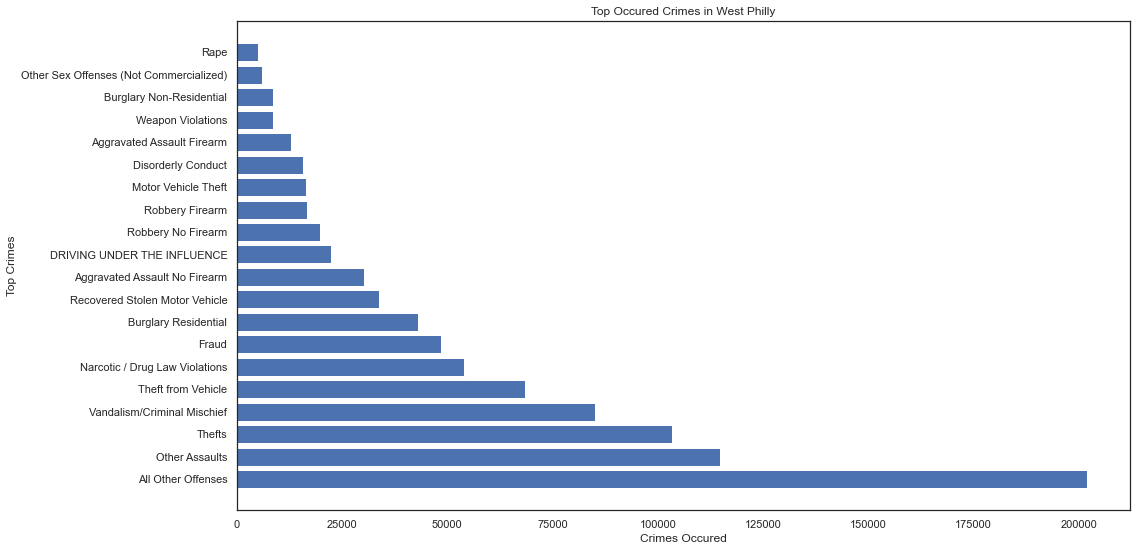

In [53]:
#Grouping data with Text_General_Code and sorting backward to get the top occured crimes

topCrimesWestPhilly = westPhillyCrimeData.groupby('Text_General_Code').sum().sort_values('events', ascending=False).reset_index()

#Getting a list of top occured crimes

topCrimesListWestPhilly, topCrimeDataWestPhilly = topCrimesWestPhilly.Text_General_Code.to_list()[:20], topCrimesWestPhilly.events.to_list()[:20]
 

#Plotting a graph to visualize each crime occured each day over last 10 years

fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(topCrimesListWestPhilly, topCrimeDataWestPhilly)
ax.set(xlabel='Crimes Occured', ylabel='Top Crimes',
       title='Top Occured Crimes in West Philly')

In [54]:
topCrimesWestPhilly

Text_General_Code  Dc_Dist     Hour  \
0                        All Other Offenses  3252937  2516259   
1                            Other Assaults  1871797  1554520   
2                                    Thefts  1615987  1459419   
3               Vandalism/Criminal Mischief  1343038  1079044   
4                        Theft from Vehicle  1101162   850238   
5            Narcotic / Drug Law Violations   934885   850326   
6                                     Fraud   833728   687039   
7                      Burglary Residential   702851   576353   
8            Recovered Stolen Motor Vehicle   569952   433090   
9             Aggravated Assault No Firearm   510626   393881   
10              DRIVING UNDER THE INFLUENCE   370039   219925   
11                       Robbery No Firearm   311229   262647   
12                          Robbery Firearm   281793   216683   
13                      Motor Vehicle Theft   275517   207210   
14                       Disorderly Conduct   232390   211063   
15               Aggravated Assault Firearm   228438   172659   
16                        Weapon Violations   152445   115111   
17                 Burglary Non-Residential   136991    87457   
18  Other Sex Offenses (Not Commercialized)   100069    83760   
19                                     Rape    86414    63590   
20     Prostitution and Commercialized Vice    42122    48821   
21                       Vagrancy/Loitering    34293    38363   
22                                    Arson    38111    21824   
23               Forgery and Counterfeiting    31604    30911   
24                       Public Drunkenness    20783    23275   
25                             Embezzlement    38960    24811   
26                      Homicide - Criminal    29481    20775   
27                    Liquor Law Violations    10244    20694   
28     Offenses Against Family and Children    11405     8373   
29                      Gambling Violations     8403     6029   
30                Receiving Stolen Property     6697     5255   
31                   Homicide - Justifiable      274      160   
32              Homicide - Gross Negligence       68       66   

               Dc_Key  UCR_General  Police_Districts           Lon  \
0   40624022776688344  525161000.0         2418123.0 -1.519054e+07   
1   23068531007185128   91758400.0         1352383.0 -8.625455e+06   
2   20785613871915912   62004000.0         1127732.0 -7.770771e+06   
3   17107936407794774  119113400.0          962217.0 -6.398199e+06   
4   13774062117902034   41101200.0          759792.0 -5.151289e+06   
5   10870625012408016   97327800.0          678605.0 -4.066350e+06   
6    9769463058837374   53427000.0          559945.0 -3.652458e+06   
7    8631904342059936   21463500.0          509216.0 -3.228236e+06   
8    6809363120908613   23706900.0          399581.0 -2.546935e+06   
9    6086473140787724   12106400.0          369035.0 -2.276107e+06   
10   4492959896175779   46922400.0          267591.0 -1.680408e+06   
11   3990578766606495    5953800.0          227767.0 -1.492402e+06   
12   3363145266176274    5018100.0          204588.0 -1.257937e+06   
13   3325924727181400   11583600.0          193862.0 -1.244487e+06   
14   3156896605511964   37682400.0          171274.0 -1.180685e+06   
15   2608770618443096    5189600.0          164102.0 -9.757054e+05   
16   1738663510917606   12969000.0          107798.0 -6.502155e+05   
17   1718807044635547    4274500.0           96842.0 -6.428890e+05   
18   1206605422891618   10201700.0           71416.0 -4.512832e+05   
19   1001920931452809     996200.0           61720.0 -3.745908e+05   
20    554132330206938    4409600.0           31586.0 -2.072993e+05   
21    535630087972701    6660000.0           27297.0 -2.002944e+05   
22    447975907344304    2005200.0           27237.0 -1.675528e+05   
23    438786389169305    2183000.0           23384.0 -1.641581e+05   
24    376855045523291    4310200.0           16134.0 -1.409118e+0

In [55]:
#Updating the dataFrames to only have the top occured crimes

topCrimesNPDF = northPhillyCrimeData[northPhillyCrimeData.Text_General_Code.isin(topCrimesListNorthPhilly)].copy()
topCrimesSPDF = southPhillyCrimeData[southPhillyCrimeData.Text_General_Code.isin(topCrimesListSouthPhilly)].copy()
topCrimesWPDF = westPhillyCrimeData[westPhillyCrimeData.Text_General_Code.isin(topCrimesListWestPhilly)].copy()

topCrimesNPDF.head(10)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
3        35   D  2009-07-19 01:09:00    2009-07-19      01:09:00     1   
4         9   R  2009-06-25 00:14:00    2009-06-25      00:14:00     0   
6        23   K  2009-02-10 14:33:00    2009-02-10      14:33:00    14   
12       22   3  2015-10-06 18:18:00    2015-10-06      18:18:00    18   
13       22   3  2015-10-09 00:49:00    2015-10-09      00:49:00     0   
15        2   1  2015-11-30 08:39:00    2015-11-30      08:39:00     8   
18       24   2  2015-04-11 17:38:00    2015-04-11      17:38:00    17   
21       22   4  2015-12-10 12:29:00    2015-12-10      12:29:00    12   
22       15   I  2009-01-11 12:30:00    2009-01-11      12:30:00    12   
25       18   2  2015-05-05 03:14:00    2015-05-05      03:14:00     3   

          Dc_Key            Location_Block  UCR_General   Text_General_Code  \
3   200935061008       5500 BLOCK N 5TH ST       1500.0   Weapon Violations   
4   200909030511       1800 BLOCK WYLIE ST       2600.0  All Other Offenses   
6   200923006310      2200 BLOCK RIDGE AVE        800.0      Other Assaults   
12  201522089374      1500 BLOCK N 15TH ST        600.0              Thefts   
13  201522090172      1500 BLOCK N 17TH ST        600.0              Thefts   
15  201502076521      6500 BLOCK CASTOR AV        600.0              Thefts   
18  201524030846        2800 BLOCK RUTH ST       2400.0  Disorderly Conduct   
21  201522110572  2600 BLOCK W THOMPSON ST        600.0              Thefts   
22  200915003568   5200 BLOCK HARBISON AVE        600.0              Thefts   
25  201518027600    5600 BLOCK CHESTNUT ST        600.0              Thefts   

    Police_Districts    Month        Lon        Lat  events  year  
3               20.0  2009-07 -75.130477  40.036389       1  2009  
4                8.0  2009-06 -75.166350  39.969532       1  2009  
6               16.0  2009-02 -75.171149  39.979586       1  2009  
12              16.0  2015-10 -75.160229  39.976134       1  2015  
13              16.0  2015-10 -75.163073  39.977872       1  2015  
15               2.0  2015-11 -75.075602  40.041270       1  2015  
18              17.0  2015-04 -75.122057  39.990907       1  2015  
21              16.0  2015-12 -75.178874  39.975724       1  2015  
22              11.0  2009-01 -75.069032  40.012430       1  2009  
25              14.0  2015-05 -75.235121  39.959754       1  2015

In [56]:
# pivot the data frame - each date gets a row, the crimes become columns and the sum of the events become the cell values 

topCrimeCasesNP = pd.pivot_table(topCrimesNPDF, values='events', index=['Dispatch_Date'], columns=['Text_General_Code'], aggfunc=np.sum)
topCrimeCasesNP.sort_values('Dispatch_Date').fillna(0)

topCrimeCasesSP = pd.pivot_table(topCrimesSPDF, values='events', index=['Dispatch_Date'], columns=['Text_General_Code'], aggfunc=np.sum)
topCrimeCasesSP.sort_values('Dispatch_Date').fillna(0)

topCrimeCasesWP = pd.pivot_table(topCrimesWPDF, values='events', index=['Dispatch_Date'], columns=['Text_General_Code'], aggfunc=np.sum)
topCrimeCasesWP.sort_values('Dispatch_Date').fillna(0)

topCrimeCasesNP.head(5)

Text_General_Code  Aggravated Assault Firearm  Aggravated Assault No Firearm  \
Dispatch_Date                                                                  
2006-01-01                               10.0                           29.0   
2006-01-02                                5.0                            8.0   
2006-01-03                                5.0                            8.0   
2006-01-04                                3.0                           12.0   
2006-01-05                                5.0                            8.0   

Text_General_Code  All Other Offenses  Burglary Non-Residential  \
Dispatch_Date                                                     
2006-01-01                       74.0                       3.0   
2006-01-02                      118.0                       6.0   
2006-01-03                       99.0                      10.0   
2006-01-04                      101.0                       6.0   
2006-01-05                       97.0                       NaN   

Text_General_Code  Burglary Residential  DRIVING UNDER THE INFLUENCE  \
Dispatch_Date                                                          
2006-01-01                         15.0                         20.0   
2006-01-02                         21.0                          9.0   
2006-01-03                         19.0                          5.0   
2006-01-04                         15.0                          7.0   
2006-01-05                         11.0                          8.0   

Text_General_Code  Disorderly Conduct  Fraud  Motor Vehicle Theft  \
Dispatch_Date                                                       
2006-01-01                        8.0    2.0                 16.0   
2006-01-02                        2.0    6.0                 14.0   
2006-01-03                        6.0   24.0                 28.0   
2006-01-04                       10.0   25.0                 17.0   
2006-01-05                        9.0   18.0                  9.0   

Text_General_Code  Narcotic / Drug Law Violations  Other Assaults  \
Dispatch_Date                                                       
2006-01-01                                   11.0            54.0   
2006-01-02                                   26.0            48.0   
2006-01-03                                   34.0            60.0   
2006-01-04                                   51.0            69.0   
2006-01-05                                   43.0            61.0   

Text_General_Code  Other Sex Offenses (Not Commercialized)  \
Dispatch_Date                                                
2006-01-01                                             1.0   
2006-01-02                                             2.0   
2006-01-03                                             5.0   
2006-01-04                                             4.0   
2006-01-05                                             7.0   

Text_General_Code  Prostitution and Commercialized Vice  \
Dispatch_Date                                             
2006-01-01                                          NaN   
2006-01-02                                          NaN   
2006-01-03                                          NaN   
2006-01-04                                          5.0   
2006-01-05                                          4.0   

Text_General_Code  Recovered Stolen Motor Vehicle  Robbery Firearm  \
Dispatch_Date                                                        
2006-01-01                                   16.0             10.0   
2006-01-02                                   35.0             15.0   
2006-01-03                                   28.0             25.0   
2006-01-04                                   30.0              9.0   
2006-01-05                                   33.0              6.0   

Text_General_Code  Robbery No Firearm  Theft from Vehicle  Thefts  \
Dispatch_Date                                                       
2006-01-01        

In [57]:
#Writing data to a csv file

#topCrimeCasesNP.to_csv('topCrimesNorthPhilly.csv')
#topCrimeCasesSP.to_csv('topCrimesSouthPhilly.csv')
#topCrimeCasesWP.to_csv('topCrimesWestPhilly.csv')

## Section 4: Statistical Analysis: ANOVA Test
### We'll use this test to compare the crime counts among north, west, and south Phliadelphia. 

In [58]:
# Totaling the number of events (# crimes by area)

topCrimeCasesNP['Total'] = topCrimeCasesNP.sum(axis=1)
topCrimeCasesSP['Total'] = topCrimeCasesSP.sum(axis=1)
topCrimeCasesWP['Total'] = topCrimeCasesWP.sum(axis=1)

In [59]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
from scipy.stats import f_oneway

In [60]:
# perform annnova test 

F, p = f_oneway(topCrimeCasesNP['Total'], topCrimeCasesSP['Total'], topCrimeCasesWP['Total'])

In [61]:
# F = variation between sample means / variation within the samples

F

36641.862962362226

In [62]:
# prob
p

0.0

<h4> Alpha value: 0.05 </h4>
    
<p> <u>Null Hypothesis: </u> Average crime count is the same across regions </p> </br>
<u>Alternative Hypothesis: </u> Average crime count is not the same across regions </br></br>
    
<u>Decision: </u> REJECT Null Hypothesis (p < 0.05)

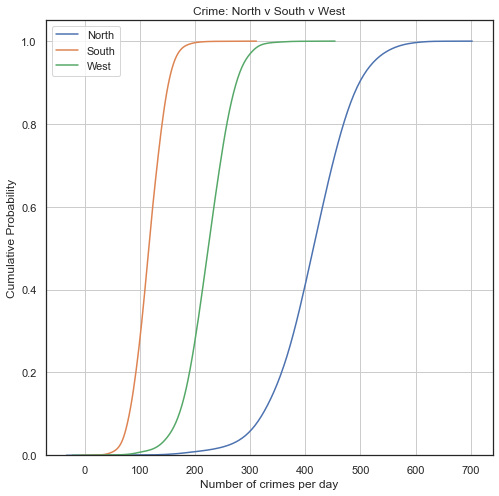

In [63]:
#https://stats.stackexchange.com/questions/380500/cdf-of-multiple-experiment-runs
import seaborn as sns

df1 = pd.DataFrame({'North':topCrimeCasesNP['Total']})    
df2 = pd.DataFrame({'South':topCrimeCasesSP['Total']})    
df3 = pd.DataFrame({'West':topCrimeCasesWP['Total']})

f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(df1['North'], cumulative=True)
ax = sns.kdeplot(df2['South'], cumulative=True)
ax = sns.kdeplot(df3['West'], cumulative=True)

plt.title('Crime: North v South v West')
plt.xlabel('Number of crimes per day')
plt.ylabel('Cumulative Probability') 
plt.grid()

plt.show()

Average crime counts are not the same across regions


## Section 5: Weather and Seasonal Crime Analysis

### integrating weather data with crime data

In [64]:
# read weather file - change this to your repo
weather = pd.read_csv("/Users/Hong/Desktop/GitHub/Crime-in-Philadelphia/Weather/all_weather_05_18.csv")

In [65]:
weather.columns

Index(['Date', 'High Temp.', 'Low Temp.', 'Avg Temp.', 'Temp Departure', 'HDD',
       'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH', 'Avg Wind Speed',
       'Avg Wind Dir', 'Avg Press', 'Total Precip', 'Num Observations'],
      dtype='object')

In [66]:
#Printing name of each columns in the data set and number of na values

for w in weather:
    value = weather[w].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",w)


There are 2743  missing values in column Total Precip


In [67]:
#Statistics about the data

weather.describe()

High Temp.    Low Temp.    Avg Temp.  Temp Departure          HDD  \
count  5113.000000  5113.000000  5113.000000     5113.000000  5113.000000   
mean     64.982985    49.197731    56.978291        1.582633    11.954234   
std      18.667482    17.095979    17.462046        7.274617    13.212460   
min      13.000000     3.000000     9.000000      -25.000000     0.000000   
25%      50.000000    35.000000    42.000000       -3.000000     0.000000   
50%      67.000000    49.000000    58.000000        1.000000     7.000000   
75%      81.000000    65.000000    73.000000        6.000000    23.000000   
max     202.000000    83.000000    93.000000       33.000000    56.000000   

               CDD          GDD  Avg Dewpoint       Avg RH  Avg Wind Speed  \
count  5113.000000  5113.000000   5113.000000  5113.000000     5113.000000   
mean      3.931743     8.583219     42.857031    62.070409        9.075885   
std       6.026597    10.028879     18.863911    14.603783        3.719754   
min       0.000000     0.000000    -12.000000    18.000000        1.000000   
25%       0.000000     0.000000     28.000000    51.000000        6.000000   
50%       0.000000     3.000000     45.000000    61.000000        8.000000   
75%       8.000000    18.000000     59.000000    73.000000       11.000000   
max      28.000000    38.000000     77.000000    99.000000       27.000000   

       Avg Wind Dir    Avg Press  Num Observations  
count   5113.000000  5113.000000       5113.000000  
mean     199.469783  1017.139272         23.840407  
std       73.944944     7.296913          0.784455  
min       27.000000   979.200000         10.000000  
25%      142.000000  1012.500000         24.000000  
50%      209.000000  1017.000000         24.000000  
75%      259.000000  1021.800000         24.000000  
max      349.000000  1042.400000         24.000000

In [68]:
# combine weather data and crime
weather_crime_data = crimeData.merge(weather, how="left", left_on = "Dispatch_Date", right_on="Date")

In [69]:
# check if everything is filled in
weather_crime_data[weather_crime_data.Date.isna()].Date.count()

0

In [70]:
# Group by violent and non violent 
weather_crime_data.loc[weather_crime_data['UCR_General'] > 800, 'Type'] = 'Non-Violent'
weather_crime_data.loc[weather_crime_data['UCR_General'] < 800, 'Type'] = 'Violent'

In [71]:
# make the date the index

weather.index = weather.Date

In [72]:
# count (sum) number of crimes (violent, nonviolent)
# then make a dataframe with the counts and the binned temp (e.g 28 --> 20)

non_violent_gb = weather_crime_data[weather_crime_data['Type'] == "Non-Violent"].groupby('Date')['Dc_Key'].agg(len)
violent_gb = weather_crime_data[weather_crime_data['Type'] == "Violent"].groupby('Date')['Dc_Key'].agg(len)

ts = pd.DataFrame({'Violent':violent_gb,
                   'Non-Violent':non_violent_gb,
                   'Binned temperature':weather['Avg Temp.']//10.*10
                   })

Text(0.5, 0.98, 'Crime vs Temperature')

<Figure size 576x432 with 0 Axes>

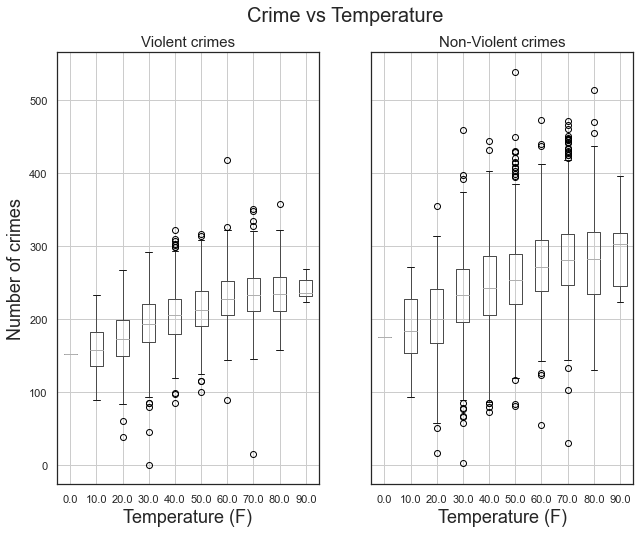

In [73]:
# Create two plots w/ Temperature and Number of Crimes seperated by type of crime

plt.figure(figsize=(8,6))
ax = ts.boxplot(['Violent','Non-Violent'],by='Binned temperature', figsize=(10,8))
ax[0].set_ylabel('Number of crimes',fontsize=18)
ax[0].set_xlabel('Temperature (F)',fontsize=18)
ax[0].set_title('Violent crimes',fontsize=15)

ax[1].set_xlabel('Temperature (F)',fontsize=18)
ax[1].set_title('Non-Violent crimes',fontsize=15)

plt.suptitle('Crime vs Temperature',fontsize=20)

The mean of the crimes is increasing with temperature. Seasonal changes can affect the crime rate (crimes are high during summer season - we will confirm in Seasonal Analysis).

In [74]:
weather_crime_data.shape

(2217021, 32)

In [75]:
# 'Trace' means that the measured amount is insigificant - we'll just make them 0.001 so that
# we know that there was rain that day
# convert the strings into float

weather_crime_data.loc[weather_crime_data['Total Precip'] == 'Trace', 'Total Precip'] = '0.001'
weather_crime_data['Total Precip'] = pd.to_numeric(weather_crime_data['Total Precip'], errors='coerce').astype('Float64')

In [76]:
print("Min Wind " + str(weather_crime_data['Avg Wind Speed'].min()) + " mph")
print("Max Wind " + str(weather_crime_data['Avg Wind Speed'].max()) + " mph")
print("")
print("Min Rainfall " + str(weather_crime_data['Total Precip'].min()) + " mm")
print("Max Rainfall " + str(weather_crime_data['Total Precip'].max()) + " mm")


Min Wind 1 mph
Max Wind 27 mph

Min Rainfall 0.001 mm
Max Rainfall 8.0 mm


In [77]:
# Categorize the wind and rain measurements

# wind speed - https://www.weather.gov/pqr/wind
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 0) & (weather_crime_data['Avg Wind Speed'] <= 3), 'Wind_Category'] = 'Light Air'
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 4) & (weather_crime_data['Avg Wind Speed'] <= 7), 'Wind_Category'] = 'Light Breeze'
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 8) & (weather_crime_data['Avg Wind Speed'] <= 12), 'Wind_Category'] = 'Gentle Breeze'
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 13) & (weather_crime_data['Avg Wind Speed'] <= 18), 'Wind_Category'] = 'Moderate Breeze'
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 19) & (weather_crime_data['Avg Wind Speed'] <= 24), 'Wind_Category'] = 'Fresh Breeze'
weather_crime_data.loc[(weather_crime_data['Avg Wind Speed'] >= 25) & (weather_crime_data['Avg Wind Speed'] <= 31), 'Wind_Category'] = 'Strong Breeze'

# Rain
weather_crime_data.loc[weather_crime_data['Total Precip'].isna(), 'Rain_Category'] = 'No rain'
weather_crime_data.loc[(weather_crime_data['Total Precip'] >= 0) & (weather_crime_data['Total Precip'] <= 2.5), 'Rain_Category'] = 'Light rain'
weather_crime_data.loc[(weather_crime_data['Total Precip'] > 2.5) & (weather_crime_data['Total Precip'] <= 7.6), 'Rain_Category'] = 'Moderate rain'
weather_crime_data.loc[weather_crime_data['Total Precip'] > 7.5, 'Rain_Category'] = 'Heavy rain'

In [78]:
# plot the rain and wind categories

import plotly.express as px
temp_grp_df = weather_crime_data.groupby(['Wind_Category', 'Rain_Category']).count().reset_index(drop=False)
temp_grp_df = temp_grp_df.assign(Crime=weather_crime_data['Type'])
temp_grp_df = temp_grp_df.dropna()
fig = px.scatter_3d(temp_grp_df, y='Wind_Category', x='Rain_Category', z="Type", color='Crime')
fig.show()


#### Seasonal analysis

In [79]:
# Group the data into seasons
# https://stackoverflow.com/questions/44526662/group-data-by-season-according-to-the-exact-dates
import datetime

bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = pd.to_datetime(weather_crime_data.Date).dt.dayofyear
weather_crime_data['SEASON'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)

In [80]:
# count number of crimes indexed by season and type

seasoncases = pd.pivot_table(weather_crime_data, values='events', index=['SEASON', 'Type'],
                             aggfunc={'events': np.sum})

In [81]:
# count number for each season

season_count = weather_crime_data.SEASON.value_counts()
season_count = season_count.sort_index(ascending=False)

In [82]:
# Convert DataFrame to a NumPy record array

flattened = pd.DataFrame(seasoncases.to_records()).sort_index(ascending=False)

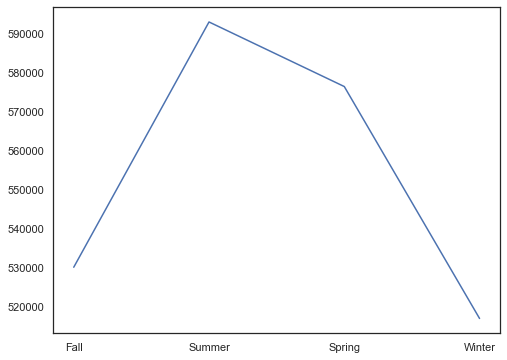

In [83]:
# plot seasona dn count

plt.figure(figsize=(8,6))
plt.plot(season_count.index, season_count.values)

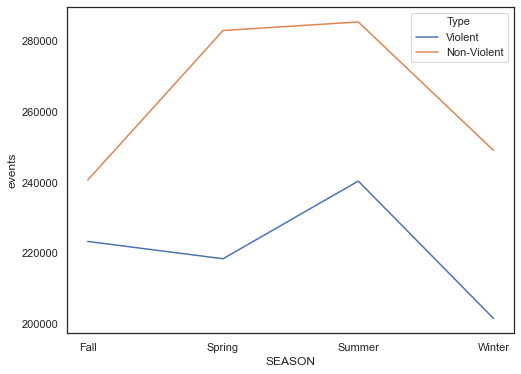

In [84]:
import seaborn as sns

# flattened2 = pd.DataFrame(seasoncases.to_records()).sort_index(ascending=False)
plt.figure(figsize=(8,6))
sns.lineplot(data=flattened, x="SEASON", y="events", hue="Type")


In [85]:
# agg the avg for weather measurements and sum number of crimes

season_agg = weather_crime_data.groupby('SEASON').agg({'Avg Temp.': 'mean', 'Avg Wind Speed': 'mean',
                          'Total Precip': 'mean','events': 'sum'})

In [86]:
season_agg

Avg Temp.  Avg Wind Speed  Total Precip  events
SEASON                                                 
Winter  38.182250       10.180912      0.184836  517047
Spring  61.998687        9.255099      0.227124  576596
Summer  76.637092        7.779146      0.353708  593175
Fall    52.775075        8.825095      0.245092  530203

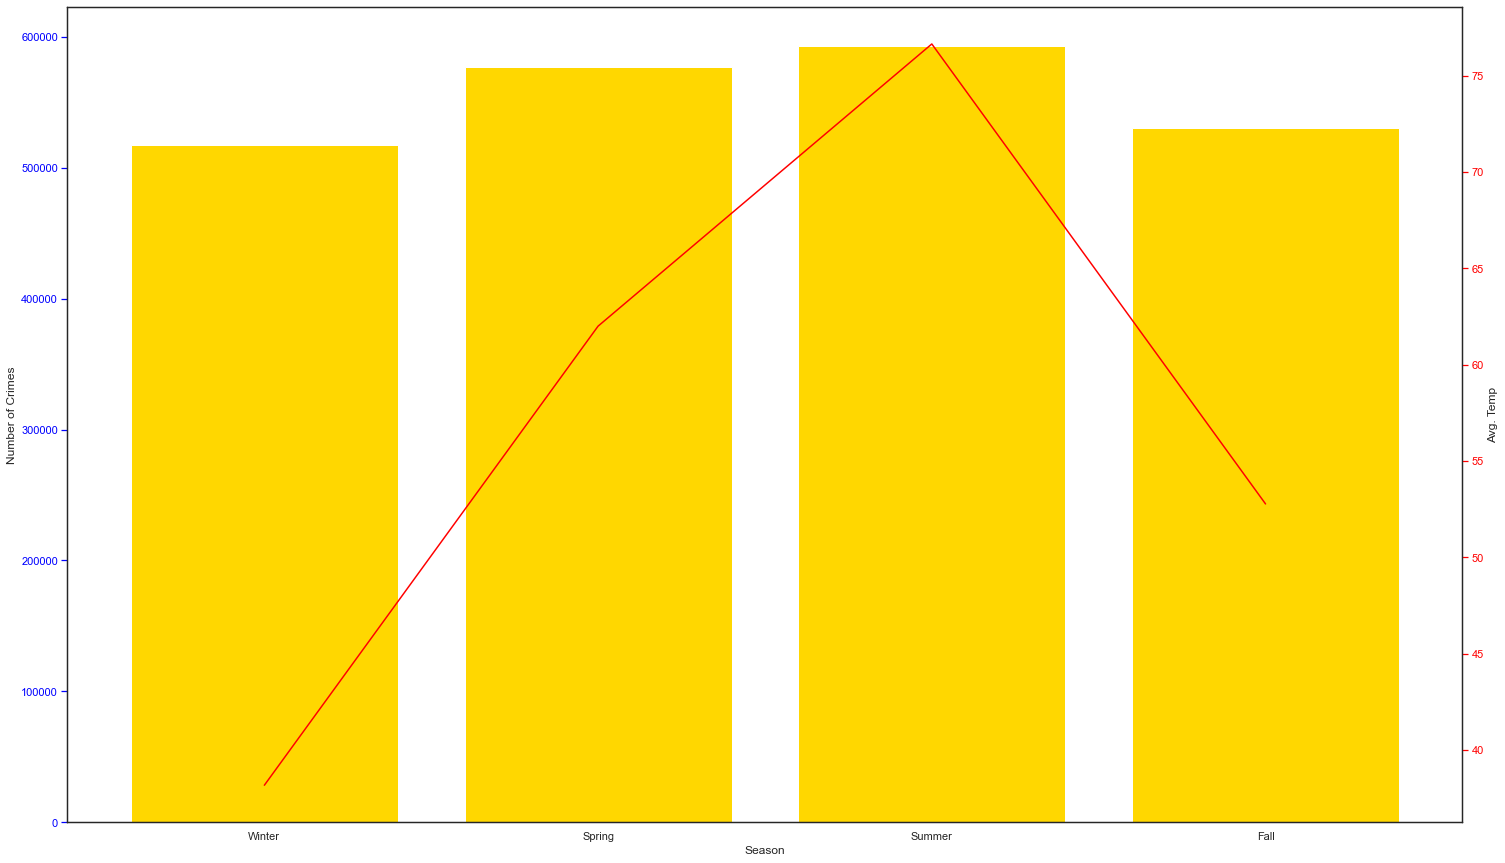

In [87]:
#Plot season, number of crimes and Avg temp

fig, bar_ax = plt.subplots()
bar_ax.bar(season_agg.index, season_agg.events, color='gold')
bar_ax.set_xlabel('Season')  
bar_ax.set_ylabel('Number of Crimes')  
bar_ax.tick_params('y', colors='blue')       
line_ax = bar_ax.twinx()
line_ax.plot(season_agg.index, season_agg['Avg Temp.'], color='red')  
line_ax.set_ylabel('Avg. Temp')  
line_ax.tick_params('y', colors='red')  

plt.show()

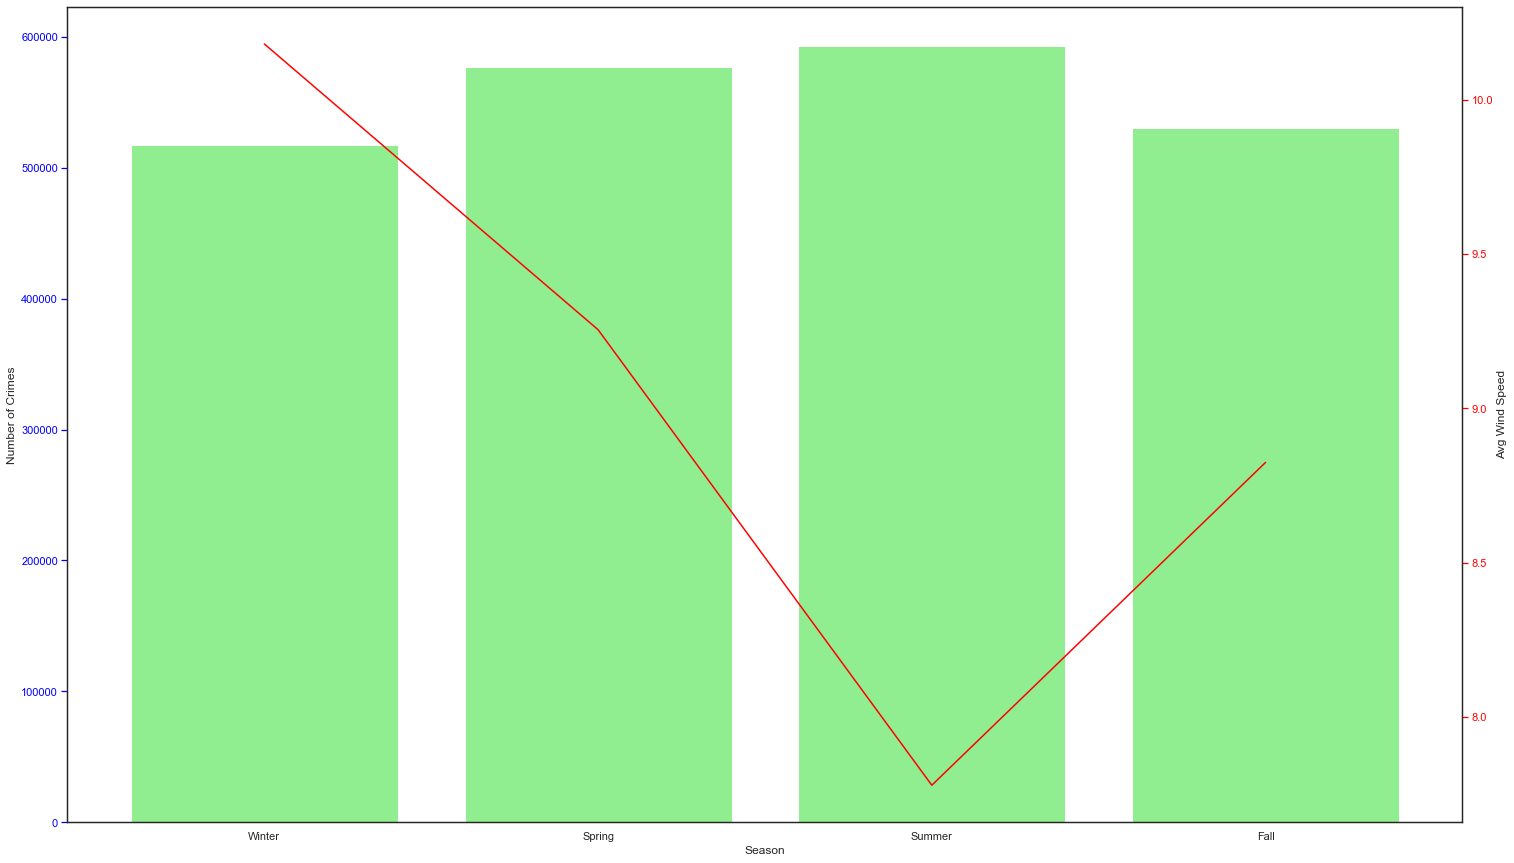

In [88]:
#Plot season, number of crimes and Avg wind speed

fig, bar_ax = plt.subplots()
bar_ax.bar(season_agg.index, season_agg.events, color='lightgreen')  
bar_ax.set_xlabel('Season')  
bar_ax.set_ylabel('Number of Crimes')  
bar_ax.tick_params('y', colors='blue') 
line_ax = bar_ax.twinx()
line_ax.plot(season_agg.index, season_agg['Avg Wind Speed'], color='red')  
line_ax.set_ylabel('Avg Wind Speed') 
line_ax.tick_params('y', colors='red') 

plt.show()

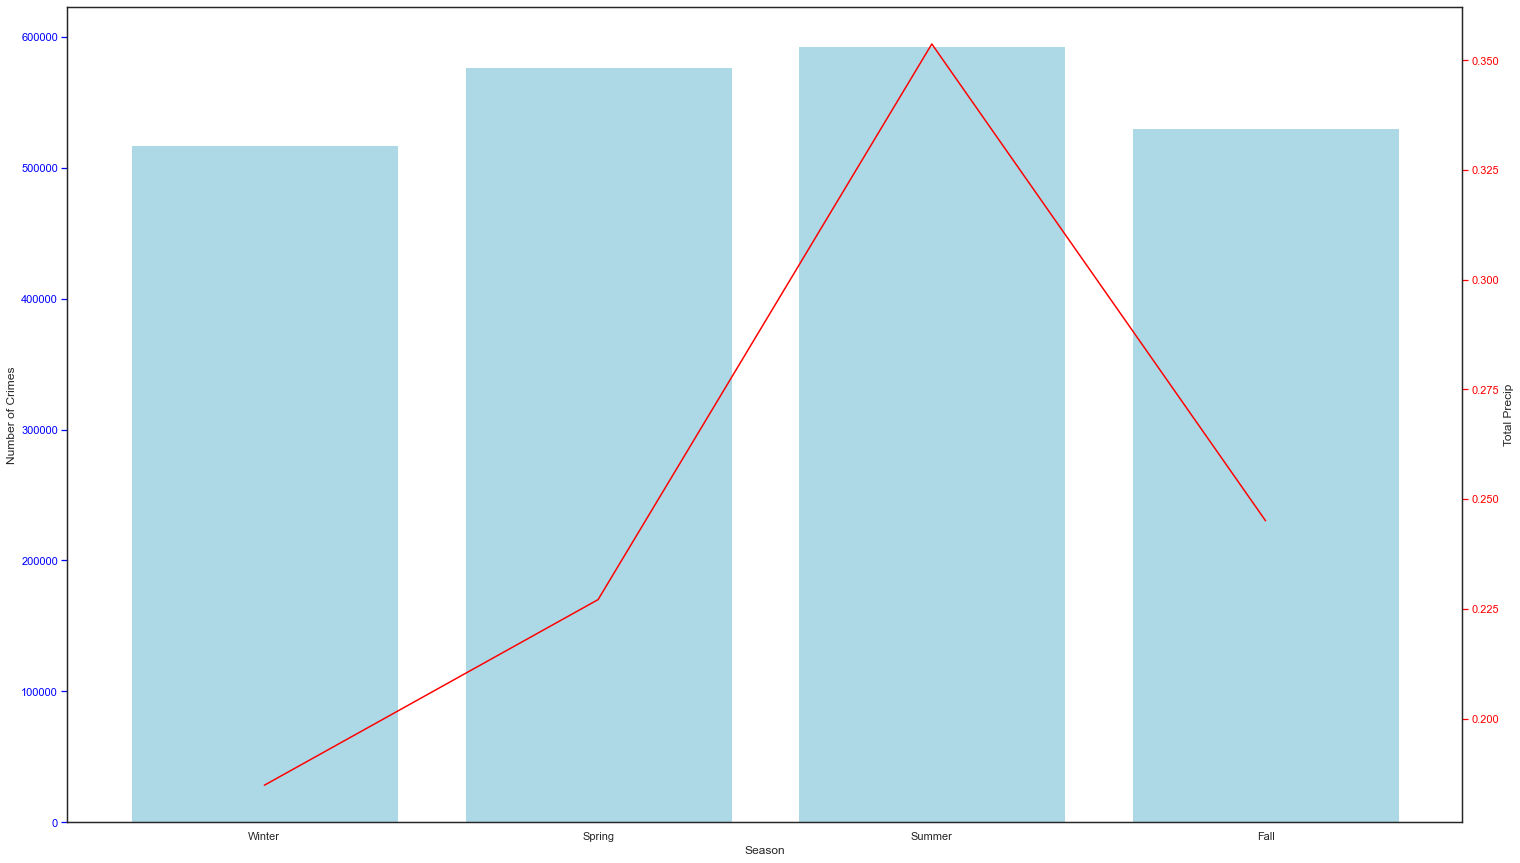

In [89]:
#Plot season, number of crimes and Avg precip

fig, bar_ax = plt.subplots()
bar_ax.bar(season_agg.index, season_agg.events, color='lightblue') 
bar_ax.set_xlabel('Season') 
bar_ax.set_ylabel('Number of Crimes')  
bar_ax.tick_params('y', colors='blue') 
line_ax = bar_ax.twinx()
line_ax.plot(season_agg.index, season_agg['Total Precip'], color='red') 
line_ax.set_ylabel('Total Precip')  
line_ax.tick_params('y', colors='red')

plt.show()

## Section 6: Machine Learning

### Getting the probability of a crime to occur given a location in philadelphia, day and month.

In [90]:
import googlemaps
import folium

In [93]:
#gmaps = googlemaps.Client(key=os.environ.get("GoogleAPIKey"))
gmaps = googlemaps.Client(key='key')

In [96]:
location = input("Enter a location in philly: \n")
geo = gmaps.geocode(location)
lat = geo[0]['geometry']['location']['lat']
lon = geo[0]['geometry']['location']['lng']
while(lat<weather_crime_data["Lat"].min() or lat>weather_crime_data["Lat"].max() 
      or lon<weather_crime_data["Lon"].min() or lon>weather_crime_data["Lon"].max()):
    print("The location entered seems to be out of philadelphia please re-enter.")
    location = input("Enter a location in philly: ")
    geo = gmaps.geocode(location)
    lat = geo[0]['geometry']['location']['lat']
    lon = geo[0]['geometry']['location']['lng']
date = input("\nEnter '1' for current date \nor any date (example: 2020-11-17): \n")
if(date == "1"):
    date = datetime.date.today()
    day = str(date.day)
    month = str(date.month)
    year = 2006
else:
    day = date.split("-")[2].strip()
    month = date.split("-")[1].strip()
    if(len(month)==1):
        month = "0"+month
    year = 2006
dates = []
for i in range(12):
    date = str(year)+"-"+month+"-"+day
    year = year + 1
    dates.append(date)
print("\nGeographical location below: ")
print("Lonitude: "+str(lon)+", Latitude: "+str(lat))

Enter a location in philly: 
California
The location entered seems to be out of philadelphia please re-enter.
Enter a location in philly: 3901 Conshohocken Ave Philadelphia PA 19131

Enter '1' for current date 
or any date (example: 2020-11-17): 
1

Geographical location below: 
Lonitude: -75.2066997, Latitude: 40.0047265


In [97]:
#Grouping the data by geoLocation

groupCrimeLatLon = weather_crime_data.groupby(["Lat", "Lon"]).sum().sort_values("Lat").reset_index()
groupCrimeLatLon = groupCrimeLatLon[["Lat", "Lon"]]
groupCrimeLatLon.head(10)

Lat        Lon
0  39.875382 -75.215271
1  39.876253 -75.244127
2  39.876264 -75.244143
3  39.876325 -75.252199
4  39.876409 -75.256513
5  39.876417 -75.256515
6  39.876671 -75.242175
7  39.876854 -75.212645
8  39.877344 -75.247870
9  39.877347 -75.247884

In [98]:
#Convert df into a numpy array to get the nearest 150 geolocations from the location

X = groupCrimeLatLon.to_numpy()

In [99]:
#result are the indeces of rows with nearest location

from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=500)
knn.fit(X)
testArray = knn.kneighbors(np.array([[lat, lon]]), return_distance=False)
testArray

array([[257524, 257548, 257569, 257440, 257418, 257618, 257619, 257638,
        257650, 257365, 257346, 257343, 257687, 257309, 257702, 257290,
        257273, 257254, 257724, 257257, 257733, 257248, 257970, 257955,
        257761, 257216, 257199, 257181, 257300, 257134, 257083, 257133,
        257204, 257175, 257025, 256981, 256737, 256823, 257123, 256590,
        256203, 257055, 256392, 256319, 256268, 256043, 256147, 256380,
        255991, 256089, 256119, 256390, 258271, 256410, 256173, 256242,
        255897, 256503, 255753, 255590, 255684, 255491, 256305, 255563,
        256521, 255481, 255408, 255380, 255433, 255371, 256588, 255217,
        256394, 255136, 255133, 256376, 255061, 256400, 254998, 256432,
        254934, 258225, 254830, 256433, 256699, 258244, 256468, 254689,
        258264, 258265, 254717, 256489, 254618, 254591, 258278, 254564,
        254523, 258293, 254661, 256775, 254438, 254463, 254627, 254440,
        254621, 258324, 256795, 256715, 256733, 254403, 254680, 

In [100]:
# adding geo loaction in a list to later filter the weather_crime data frame

folium_map = folium.Map(location=[lat, lon],
                        zoom_start=16,
                       )
folium.CircleMarker(
    location=[lat, lon],
    radius=50,
    color='red',
    fill=True,
    fill_color='red'
).add_to(folium_map)
nearestNeighborLonLat = []
for i in testArray[0]:
    nearestNeighborLonLat.append(str(groupCrimeLatLon.iloc[i][1])+", "+str(groupCrimeLatLon.iloc[i][0]))
    folium.CircleMarker(
        location=[groupCrimeLatLon.iloc[i][0], 
                  groupCrimeLatLon.iloc[i][1]]
    ).add_to(folium_map)
nearestNeighborLonLat[:5]

['-75.206379, 40.002886',
 '-75.206287, 40.002899',
 '-75.206242, 40.002906',
 '-75.206652, 40.002846000000005',
 '-75.206744, 40.002833']

In [101]:
folium_map

In [102]:
latToArray = weather_crime_data["Lat"].to_list()
lonToArray = weather_crime_data["Lon"].to_list()

In [103]:
len(latToArray), len(lonToArray)

(2217021, 2217021)

In [104]:
lonLatToArray = list()
for i in range(len(latToArray)):
    lonLatToArray.append(str(lonToArray[i])+", "+str(latToArray[i]))
lonLatToArray = np.array(lonLatToArray)

In [105]:
weather_crime_data["LonLat"] = lonLatToArray.reshape(-1, 1)
weather_crime_data

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
0             35   D  2009-07-19 01:09:00    2009-07-19      01:09:00     1   
1              9   R  2009-06-25 00:14:00    2009-06-25      00:14:00     0   
2             17   1  2015-04-25 12:50:00    2015-04-25      12:50:00    12   
3             23   K  2009-02-10 14:33:00    2009-02-10      14:33:00    14   
4             22   3  2015-10-06 18:18:00    2015-10-06      18:18:00    18   
...          ...  ..                  ...           ...           ...   ...   
2217016        1   1  2017-01-17 09:13:00    2017-01-17      09:13:00     9   
2217017       16   1  2017-01-17 22:35:00    2017-01-17      22:35:00    22   
2217018       16   1  2017-01-17 22:35:00    2017-01-17      22:35:00    22   
2217019       19   2  2017-01-18 01:23:00    2017-01-18      01:23:00     1   
2217020       16   1  2017-01-17 16:20:00    2017-01-17      16:20:00    16   

               Dc_Key            Location_Block  UCR_General  \
0        200935061008       5500 BLOCK N 5TH ST       1500.0   
1        200909030511       1800 BLOCK WYLIE ST       2600.0   
2        201517017705      800 BLOCK S BROAD ST        600.0   
3        200923006310      2200 BLOCK RIDGE AVE        800.0   
4        201522089374      1500 BLOCK N 15TH ST        600.0   
...               ...                       ...          ...   
2217016  201701002678     2100 BLOCK S BROAD ST       2600.0   
2217017  201716002117    N 38TH ST / WALLACE ST       2600.0   
2217018  201716002118    N 38TH ST / WALLACE ST       2600.0   
2217019  201719004939   6000 BLOCK HAVERFORD AV       2600.0   
2217020  201716002057  N 34TH ST / LANCASTER AV        800.0   

          Text_General_Code  ...  Avg Wind Speed Avg Wind Dir  Avg Press  \
0         Weapon Violations  ...               7          248     1018.8   
1        All Other Offenses  ...               7          152     1009.0   
2                    Thefts  ...               9          235     1011.2   
3            Other Assaults  ...               3          186     1023.2   
4                    Thefts  ...               5          267     1017.0   
...                     ...  ...             ...          ...        ...   
2217016  All Other Offenses  ...               3           70     1020.4   
2217017  All Other Offenses  ...               3           70     1020.4   
2217018  All Other Offenses  ...               3           70     1020.4   
2217019  All Other Offenses  ...               7          230     1014.5   
2217020      Other Assaults  ...               3           70     1020.4   

         Total Precip  Num Observations         Type  Wind_Category  \
0                 NaN                20  Non-Violent   Light Breeze   
1                 NaN                23  Non-Violent   Light Breeze   
2                 NaN                24      Violent  Gentle Breeze   
3               0.001                23          NaN      Light Air   
4                 NaN                24      Violent   Light Breeze   
...               ...               ...          ...            ...   
2217016         0.150                24  Non-Violent      Light Air   
2217017         0.150                24  Non-Violent      Light Air   
2217018         0.150                24  Non-Violent      Light Air   
2217019         0.220                24  Non-Violent   Light Breeze   
2217020         0.150                24          NaN      Light Air   

         Rain_Category  SEASON                         LonLat  
0              No rain  Summer          -75.130477, 40.036389  
1              No rain  Summer           -75.16635, 39.969532  
2              No rain  Spring           -75.166412, 39.94007  
3           Light rain  Winter          -75.171149, 39.979586  
4              No rain    Fall          -75.160229, 39.976134  
...                ...     ...                            ...  
2217016     Light rain  Winter  -75.16999200000001, 39.923556  
2217017     L

In [106]:
#Filtering the dataframe to to only have data from the nearest locations

nearestLocationsCrimesDF = weather_crime_data[weather_crime_data.LonLat.isin(nearestNeighborLonLat)].copy()
nearestLocationsCrimesDF.head(10)

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
508        19   3  2013-09-06 17:00:00    2013-09-06      17:00:00    17   
511        19   3  2013-06-17 00:07:00    2013-06-17      00:07:00     0   
1262       19   3  2015-07-06 12:49:00    2015-07-06      12:49:00    12   
1319       19   F  2009-01-29 13:11:00    2009-01-29      13:11:00    13   
1841       19   F  2009-07-06 22:06:00    2009-07-06      22:06:00    22   
1940       19   F  2009-06-22 18:45:00    2009-06-22      18:45:00    18   
1966       19   F  2009-07-09 11:46:00    2009-07-09      11:46:00    11   
1990       19   3  2009-09-09 16:25:00    2009-09-09      16:25:00    16   
2038       19   3  2009-12-31 05:29:00    2009-12-31      05:29:00     5   
2291       19   3  2009-12-06 16:56:00    2009-12-06      16:56:00    16   

            Dc_Key                Location_Block  UCR_General  \
508   201319076820        3700 BLOCK LANKENAU RD       1100.0   
511   201319050522           4000 BLOCK CITY AVE       1200.0   
1262  201519066469  4000 BLOCK PRESIDENTIAL BLVD        600.0   
1319  200919008419           4000 BLOCK CITY AVE        800.0   
1841  200919061343       3900 BLOCK LANKENAU AVE        800.0   
1940  200919056498           4000 BLOCK CITY AVE        800.0   
1966  200919062298            3900 BLOCK FORD RD        800.0   
1990  200919083020        3700 BLOCK LANKENAU RD        800.0   
2038  200919115133   3700 BLOCK CONSHOHOCKEN AVE        400.0   
2291  200919109013   3600 BLOCK CONSHOHOCKEN AVE        800.0   

               Text_General_Code  ...  Avg Wind Speed Avg Wind Dir  Avg Press  \
508                        Fraud  ...               8          183     1022.9   
511                 Embezzlement  ...               8          221     1012.8   
1262                      Thefts  ...               6          114     1020.0   
1319              Other Assaults  ...              10          280     1015.9   
1841              Other Assaults  ...               7          260     1008.5   
1940              Other Assaults  ...               9          186     1004.2   
1966              Other Assaults  ...              10          133     1021.1   
1990              Other Assaults  ...               8          124     1020.4   
2038  Aggravated Assault Firearm  ...               2           67     1021.3   
2291              Other Assaults  ...              10          296     1025.4   

      Total Precip  Num Observations         Type  Wind_Category  \
508            NaN                24  Non-Violent  Gentle Breeze   
511          0.001                24  Non-Violent  Gentle Breeze   
1262           NaN                18      Violent   Light Breeze   
1319           NaN                24          NaN  Gentle Breeze   
1841           NaN                24          NaN   Light Breeze   
1940         0.170                24          NaN  Gentle Breeze   
1966           NaN                24          NaN  Gentle Breeze   
1990         0.001                24          NaN  Gentle Breeze   
2038         0.280                24      Violent      Light Air   
2291           NaN                24          NaN  Gentle Breeze   

      Rain_Category  SEASON                                  LonLat  
508         No rain  Summer                   -75.204888, 40.002392  
511      Light rain  Spring                   -75.210828, 40.008482  
1262        No rain  Summer                     -75.2118, 40.005101  
1319        No rain  Winter                   -75.210828, 40.008482  
1841        No rain  Summer                     -75.209453, 40.0007  
1940     Light rain  Summer                   -75.210828, 40.008482  
1966        No rain  Summer                   -75.207154, 39.999076  
1990     Light rain  Summer                   -75.203254, 40.002576  
2038     Light rain  Winter  -75.20334100000001, 40.003432000000004  
2291        No rain    Fall                   -75.202537, 40.004181  

[10 rows x 36 columns]

In [107]:
nearestLocationsCrimesDF.shape

(2992, 36)

In [108]:
#Filtering the dataframe to to only have data from given day and month

nearestLocationsCrimesDF = nearestLocationsCrimesDF[nearestLocationsCrimesDF.Dispatch_Date.isin(dates)].copy()
nearestLocationsCrimesDF

Dc_Dist Psa   Dispatch_Date_Time Dispatch_Date Dispatch_Time  Hour  \
70469         19   3  2009-11-17 16:25:00    2009-11-17      16:25:00    16   
127129        19   3  2010-11-17 17:54:00    2010-11-17      17:54:00    17   
602872        19   3  2012-11-17 02:48:00    2012-11-17      02:48:00     2   
605681        19   3  2012-11-17 13:02:00    2012-11-17      13:02:00    13   
1240373       19   F  2006-11-17 17:19:00    2006-11-17      17:19:00    17   
1328281       19   F  2006-11-17 16:54:00    2006-11-17      16:54:00    16   
2202154       19   3  2016-11-17 19:16:00    2016-11-17      19:16:00    19   
2203123       19   3  2016-11-17 08:04:00    2016-11-17      08:04:00     8   

               Dc_Key                Location_Block  UCR_General  \
70469    200919103781        2700 BLOCK CRANSTON RD       1100.0   
127129   201019107606   3500 BLOCK CONSHOHOCKEN AVE       2100.0   
602872   201219096749       3900 BLOCK LANKENAU AVE        800.0   
605681   201219096803    3900 BLOCK CONSHOHOCKEN AV       1100.0   
1240373  200619085425  4000 BLOCK PRESIDENTIAL BLVD       1400.0   
1328281  200619085416            0 BLOCK WINDING DR        600.0   
2202154  201619104615   3900 BLOCK CONSHOHOCKEN AVE        600.0   
2203123  201619104390  4100 BLOCK PRESIDENTIAL BLVD        600.0   

                   Text_General_Code  ...  Avg Wind Speed Avg Wind Dir  \
70469                          Fraud  ...               8           65   
127129   DRIVING UNDER THE INFLUENCE  ...              19          244   
602872                Other Assaults  ...               7          117   
605681                         Fraud  ...               7          117   
1240373  Vandalism/Criminal Mischief  ...              13          272   
1328281                       Thefts  ...              13          272   
2202154                       Thefts  ...               8          302   
2203123           Theft from Vehicle  ...               8          302   

         Avg Press  Total Precip  Num Observations         Type  \
70469       1025.0           NaN                24  Non-Violent   
127129      1007.2          0.14                24  Non-Violent   
602872      1035.3           NaN                24          NaN   
605681      1035.3           NaN                24  Non-Violent   
1240373     1008.8           NaN                24  Non-Violent   
1328281     1008.8           NaN                24      Violent   
2202154     1017.4           NaN                24      Violent   
2203123     1017.4           NaN                24      Violent   

           Wind_Category  Rain_Category  SEASON  \
70469      Gentle Breeze        No rain    Fall   
127129      Fresh Breeze     Light rain    Fall   
602872      Light Breeze        No rain    Fall   
605681      Light Breeze        No rain    Fall   
1240373  Moderate Breeze        No rain    Fall   
1328281  Moderate Breeze        No rain    Fall   
2202154    Gentle Breeze        No rain    Fall   
2203123    Gentle Breeze        No rain    Fall   

                                         LonLat  
70469                     -75.210199, 40.000761  
127129                    -75.202066, 40.004635  
602872                    -75.208099, 40.001149  
605681   -75.20948299999999, 40.002466999999996  
1240373                     -75.2118, 40.005101  
1328281                   -75.209585, 40.007256  
2202154                   -75.207823, 40.002747  
2203123          -75.209727, 40.007090000000005  

[8 rows x 36 columns]

In [109]:
# pivot the data frame - each date gets a row, the crimes become columns and the sum of the events become the cell values 

topCrimeCasesNearestLocation = pd.pivot_table(nearestLocationsCrimesDF, values='events', index=['Dispatch_Date'], columns=['Text_General_Code'], aggfunc=np.sum)
topCrimeCasesNearestLocation = topCrimeCasesNearestLocation.sort_values('Dispatch_Date').fillna(0)
topCrimeCasesNearestLocation

Text_General_Code  DRIVING UNDER THE INFLUENCE  Fraud  Other Assaults  \
Dispatch_Date                                                           
2006-11-17                                 0.0    0.0             0.0   
2009-11-17                                 0.0    1.0             0.0   
2010-11-17                                 1.0    0.0             0.0   
2012-11-17                                 0.0    1.0             1.0   
2016-11-17                                 0.0    0.0             0.0   

Text_General_Code  Theft from Vehicle  Thefts  Vandalism/Criminal Mischief  
Dispatch_Date                                                               
2006-11-17                        0.0     1.0                          1.0  
2009-11-17                        0.0     0.0                          0.0  
2010-11-17                        0.0     0.0                          0.0  
2012-11-17                        0.0     0.0                          0.0  
2016-11-17                        1.0     1.0                          0.0

In [110]:
# adding geo loaction in a list to later filter the weather_crime data frame

filtered_map = folium.Map(location=[lat, lon],
                        zoom_start=16)
folium.CircleMarker(
    location=[lat, lon],
    radius=50,
    color='red',
    fill=True,
    fill_color='red'
).add_to(filtered_map)
for i in range(nearestLocationsCrimesDF.shape[0]):
    folium.CircleMarker(
        location=[nearestLocationsCrimesDF["Lat"].to_list()[i], 
                  nearestLocationsCrimesDF["Lon"].to_list()[i]]
    ).add_to(filtered_map)
filtered_map

AxesSubplot(0.125,0.125;0.775x0.755)


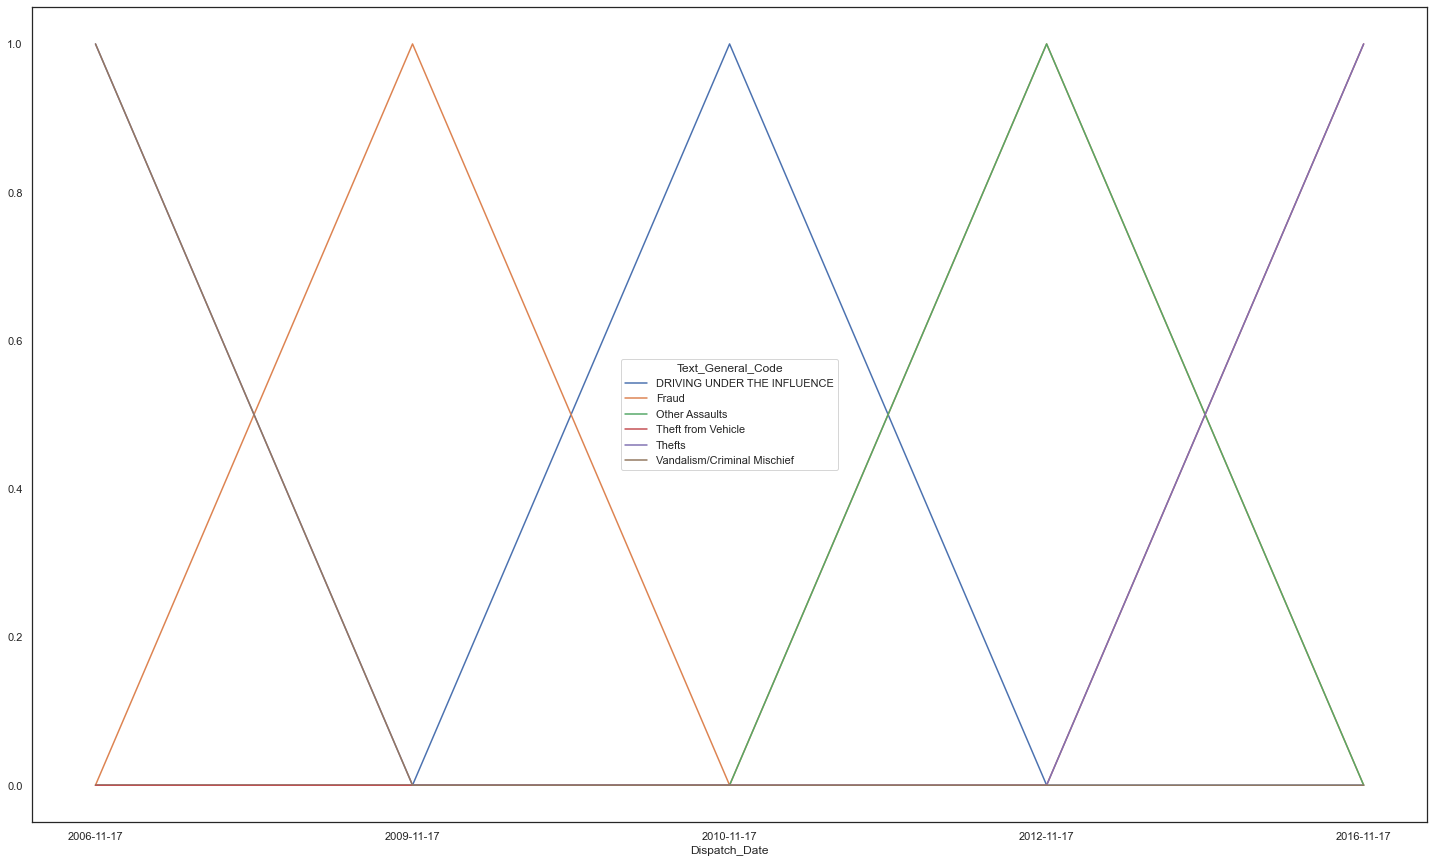

In [111]:
print(topCrimeCasesNearestLocation.plot())

In [112]:
topCrimeCasesNearestLocation["event"] = 1
probabilityOfCrime = topCrimeCasesNearestLocation["event"].sum() / len(dates)
probabilityOfCrime

0.4166666666666667